### Importing neccessary libraries for Exploartory data analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [4]:
bd =  pd.read_csv('churn.csv')
bd.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
bd.shape

(10000, 14)

In [6]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bd.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [8]:
bd.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
bd.drop(['RowNumber','CustomerId','Exited'],axis=1).describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [9]:
bd['Age'].nunique()

70

In [10]:
bd['Tenure'].nunique()

11

In [11]:
bd['NumOfProducts'].nunique()

4

In [12]:
bd['CreditScore'].nunique()

460

### Checking the distribution of the target variable

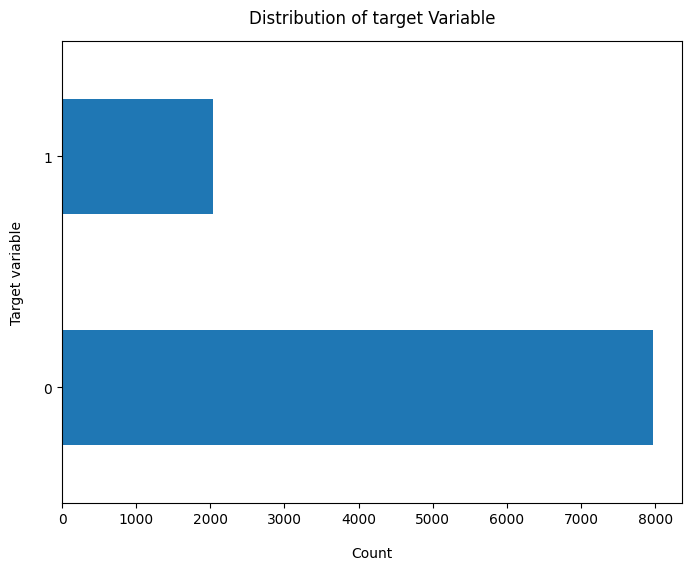

In [13]:
bd['Exited'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target variable",labelpad=14)
plt.title("Distribution of target Variable", y=1.02);

From the above plot, it is is evident that the distribution of the classes in the exited column is highly imbalanced. i.e, we have more of the distribution belonging to class 0 than class 1. This will be fixed before training our model by resampling techniques to make sure our model is adequately trained on datapoints for both classes

In [15]:
100*bd['Exited'].value_counts()/len(bd['Exited'])

0    79.63
1    20.37
Name: Exited, dtype: float64

Data is highly Imbalanced

In [17]:
bd.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data cleaning

creating a copy of the original dataset

In [10]:
bank_data = bd.copy()

In [19]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
print("Maximum Tenure value is {}".format(bank_data['Tenure'].max()))
print("Maximum Age value of customer is {}".format(bank_data['Age'].max()))
print("Maximum Est.salary value is {}".format(bank_data['EstimatedSalary'].max()))
print("Maximum Balance is {}".format(bank_data['Balance'].max()))
print("Maximum creditScore is {}".format(bank_data['CreditScore'].max()))

Maximum Tenure value is 10
Maximum Age value of customer is 92
Maximum Est.salary value is 199992.48
Maximum Balance is 250898.09
Maximum creditScore is 850


## grouping some features into ranges

In [21]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
bank_data['Age'].max()

92

### Grouping tenures column

In [12]:
ten = ["{0} - {1}".format(i, i+2) for i in range(0, 12, 2)]
print(ten)

['0 - 2', '2 - 4', '4 - 6', '6 - 8', '8 - 10', '10 - 12']


In [25]:
bank_data['tenure_group'] = pd.cut(bank_data.Tenure, range(0, 14, 2), right=False, labels=ten)

In [26]:
bank_data['tenure_group'].value_counts()

2 - 4      2057
8 - 10     2009
4 - 6      2001
6 - 8      1995
0 - 2      1448
10 - 12     490
Name: tenure_group, dtype: int64

### Grouping credit_score column

In [15]:
label_credit = ["{0} - {1}".format(i, i+100) for i in range(350, 900, 100)]
print(label_credit)

['350 - 450', '450 - 550', '550 - 650', '650 - 750', '750 - 850', '850 - 950']


In [16]:
bank_data['Credit_Sc_group'] = pd.cut(bank_data.CreditScore, range(350, 1000, 100), right=False, labels=label_credit)

In [18]:
bank_data['Credit_Sc_group'].value_counts()

650 - 750    3477
550 - 650    3310
450 - 550    1405
750 - 850    1390
850 - 950     233
350 - 450     185
Name: Credit_Sc_group, dtype: int64

### Grouping age column

In [20]:
#Age bins
label_age = ["{0} - {1}".format(i, i+15) for i in range(18,92,15)]
print(label_age)

['18 - 33', '33 - 48', '48 - 63', '63 - 78', '78 - 93']


In [21]:
bank_data['age_group']= pd.cut(bank_data.Age, range(18,94,15), right= False, labels= label_age )

In [22]:
bank_data['age_group'].value_counts()

33 - 48    5500
18 - 33    2790
48 - 63    1351
63 - 78     335
78 - 93      24
Name: age_group, dtype: int64

In [23]:
### Grouping balance 

In [24]:
#Balance Bins
bal = ["{0} - {1}".format(i, i+25000) for i in range(0,260000,26000)]
print(bal)

['0 - 25000', '26000 - 51000', '52000 - 77000', '78000 - 103000', '104000 - 129000', '130000 - 155000', '156000 - 181000', '182000 - 207000', '208000 - 233000', '234000 - 259000']


In [25]:
bank_data['Balance_grp']= pd.cut(bank_data.Balance, range(0,270000,26000), right= False, labels= bal)

In [26]:
bank_data['Balance_grp'].value_counts()

0 - 25000          3623
104000 - 129000    2227
130000 - 155000    1583
78000 - 103000     1358
156000 - 181000     559
52000 - 77000       430
182000 - 207000     125
26000 - 51000        79
208000 - 233000      14
234000 - 259000       2
Name: Balance_grp, dtype: int64

### Grouping salary column

In [28]:
#Salary bins
sal  = ["{0} - {1}".format(i,i+20000) for i in range(11, 200000, 20000)]
print(sal)

['11 - 20011', '20011 - 40011', '40011 - 60011', '60011 - 80011', '80011 - 100011', '100011 - 120011', '120011 - 140011', '140011 - 160011', '160011 - 180011', '180011 - 200011']


In [29]:
bank_data['salary_group']= pd.cut(bank_data.EstimatedSalary, range(11,220000,20000), right= False, labels= sal)

In [30]:
bank_data['salary_group'].value_counts()

60011 - 80011      1028
100011 - 120011    1027
160011 - 180011    1010
120011 - 140011    1009
40011 - 60011      1006
80011 - 100011     1001
11 - 20011          987
180011 - 200011     984
140011 - 160011     980
20011 - 40011       968
Name: salary_group, dtype: int64

In [31]:
bank_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Credit_Sc_group,age_group,Balance_grp,salary_group
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,750 - 850,33 - 48,0 - 25000,80011 - 100011
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,450 - 550,33 - 48,52000 - 77000,100011 - 120011
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,650 - 750,33 - 48,0 - 25000,40011 - 60011
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,750 - 850,33 - 48,52000 - 77000,80011 - 100011
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,750 - 850,18 - 33,130000 - 155000,20011 - 40011


In [32]:
bank_data.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
Credit_Sc_group    category
age_group          category
Balance_grp        category
salary_group       category
dtype: object

In [33]:
#droppping columns not needed
bank_data.drop(columns = ['RowNumber', 'CustomerId', 'Surname', 
                          'CreditScore','Geography','Age', 'Tenure',
                          'Balance','EstimatedSalary'],axis = 1, inplace = True)
bank_data.head()

,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,Credit_Sc_group,age_group,Balance_grp,salary_group
0,Female,1,1,1,1,550 - 650,33 - 48,0 - 25000,100011 - 120011
1,Female,1,0,1,0,550 - 650,33 - 48,78000 - 103000,100011 - 120011
2,Female,3,1,0,1,450 - 550,33 - 48,156000 - 181000,100011 - 120011
3,Female,2,0,0,0,650 - 750,33 - 48,0 - 25000,80011 - 100011
4,Female,1,1,1,0,850 - 950,33 - 48,104000 - 129000,60011 - 80011


## Exploratory Data Ananlysis

### Univariate Analysis
Plot individual columns

In [39]:
bank_data_new = pd.get_dummies(bank_data)
bank_data_new.head()

,NumOfProducts,HasCrCard,IsActiveMember,Exited,Gender_Female,Gender_Male,Credit_Sc_group_350 - 450,Credit_Sc_group_450 - 550,Credit_Sc_group_550 - 650,Credit_Sc_group_650 - 750,...,salary_group_11 - 20011,salary_group_20011 - 40011,salary_group_40011 - 60011,salary_group_60011 - 80011,salary_group_80011 - 100011,salary_group_100011 - 120011,salary_group_120011 - 140011,salary_group_140011 - 160011,salary_group_160011 - 180011,salary_group_180011 - 200011
0,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


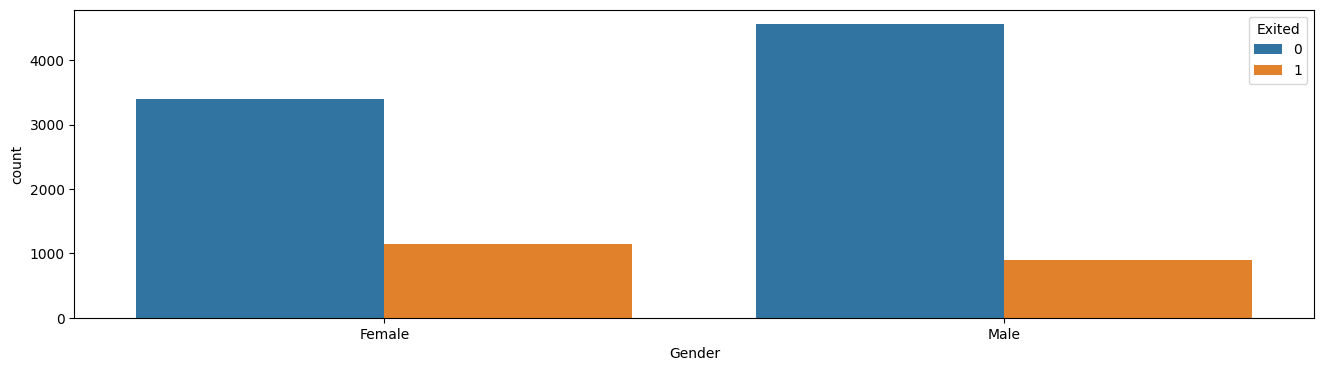

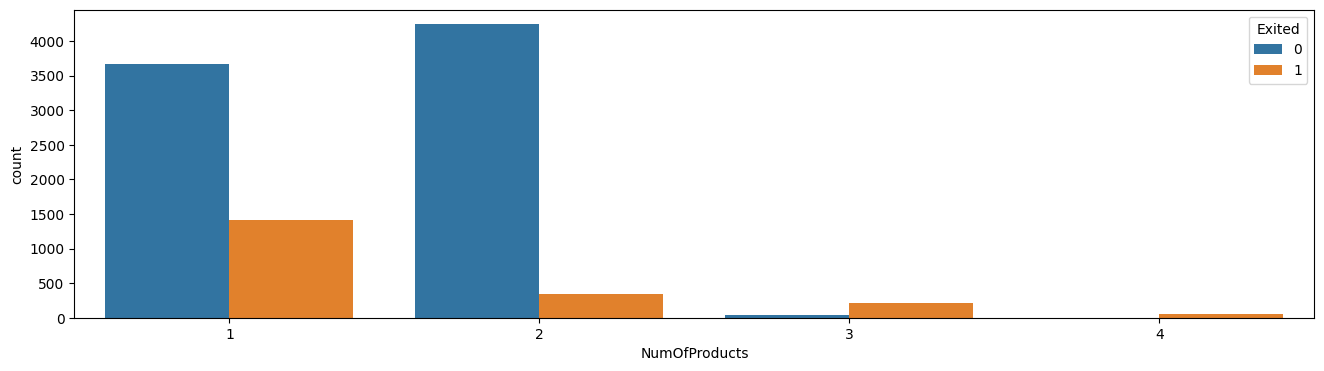

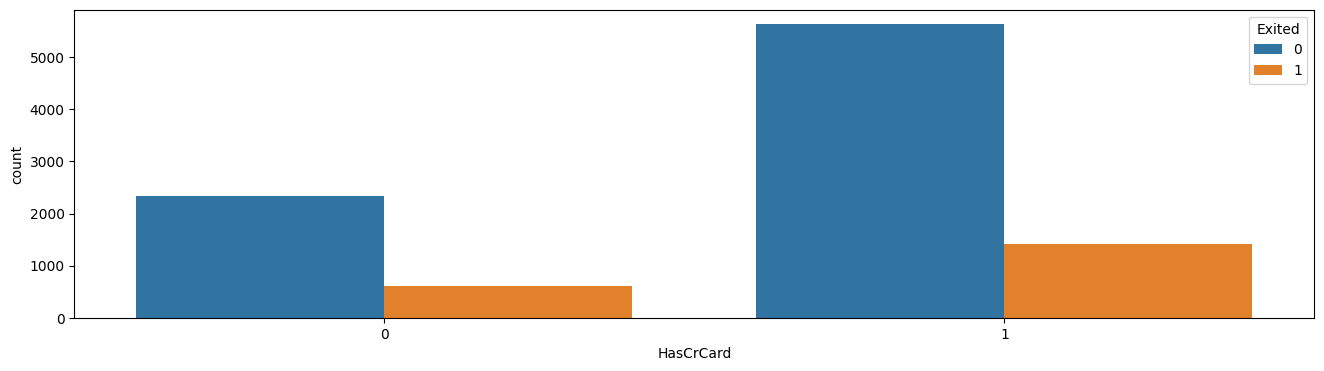

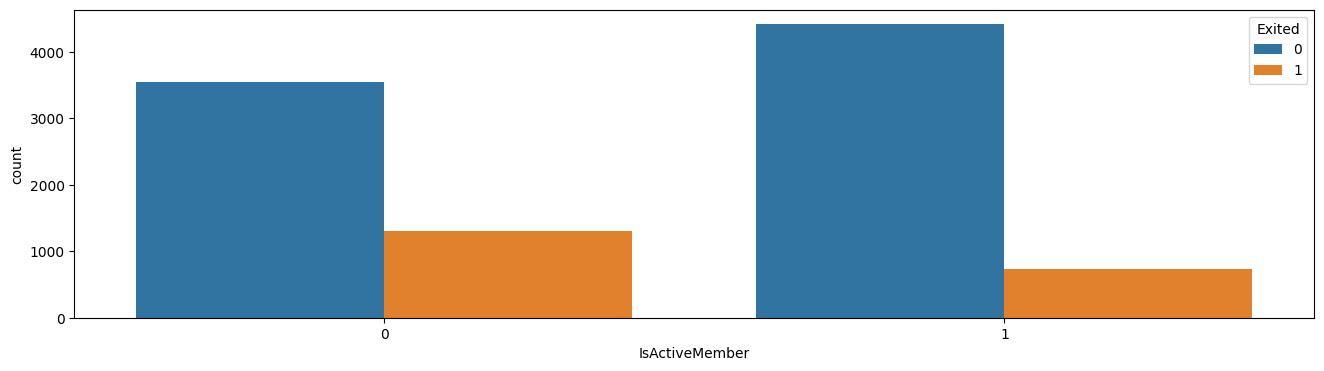

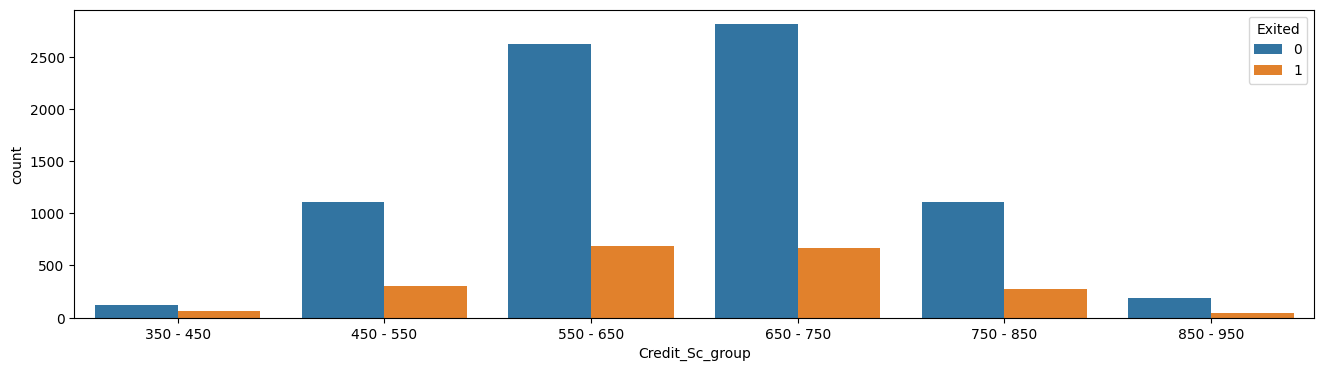

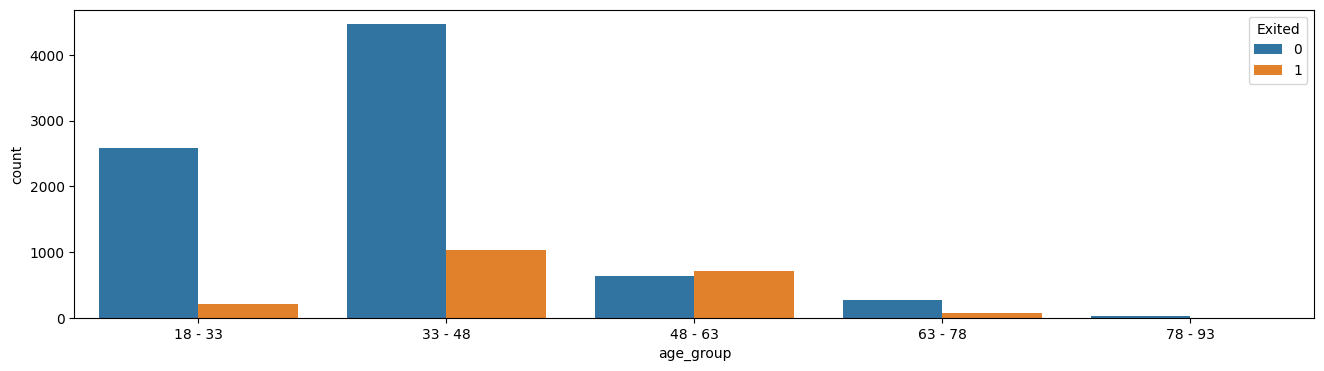

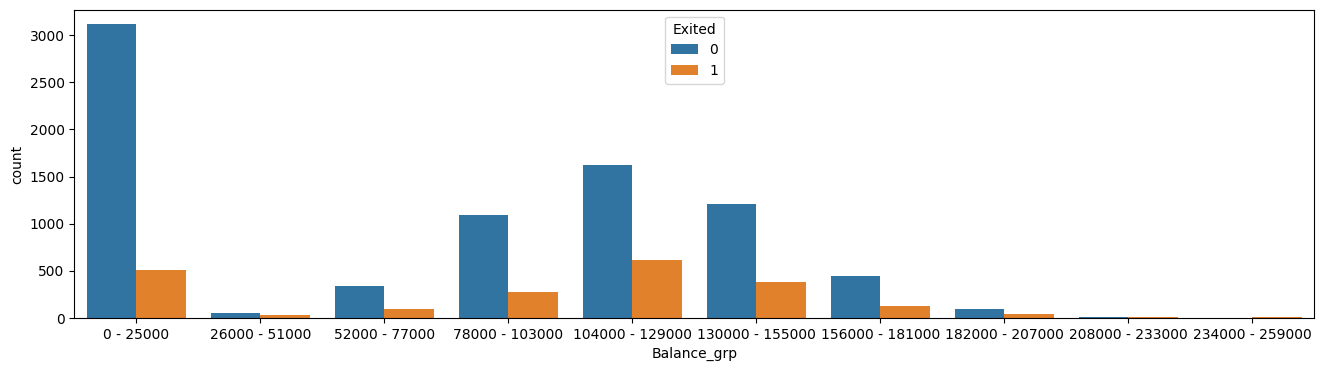

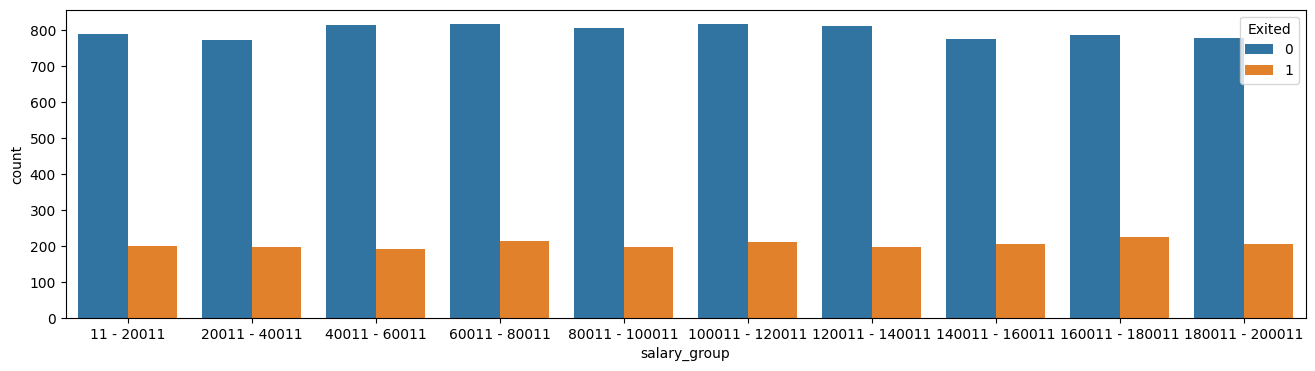

In [34]:
for i, predictor in enumerate(bank_data.drop(columns=['Exited'])):
    plt.figure(i, figsize=(16, 4))
    sns.countplot(data= bank_data, x = predictor, hue= 'Exited')

## Encoding Dummy data

<AxesSubplot:>

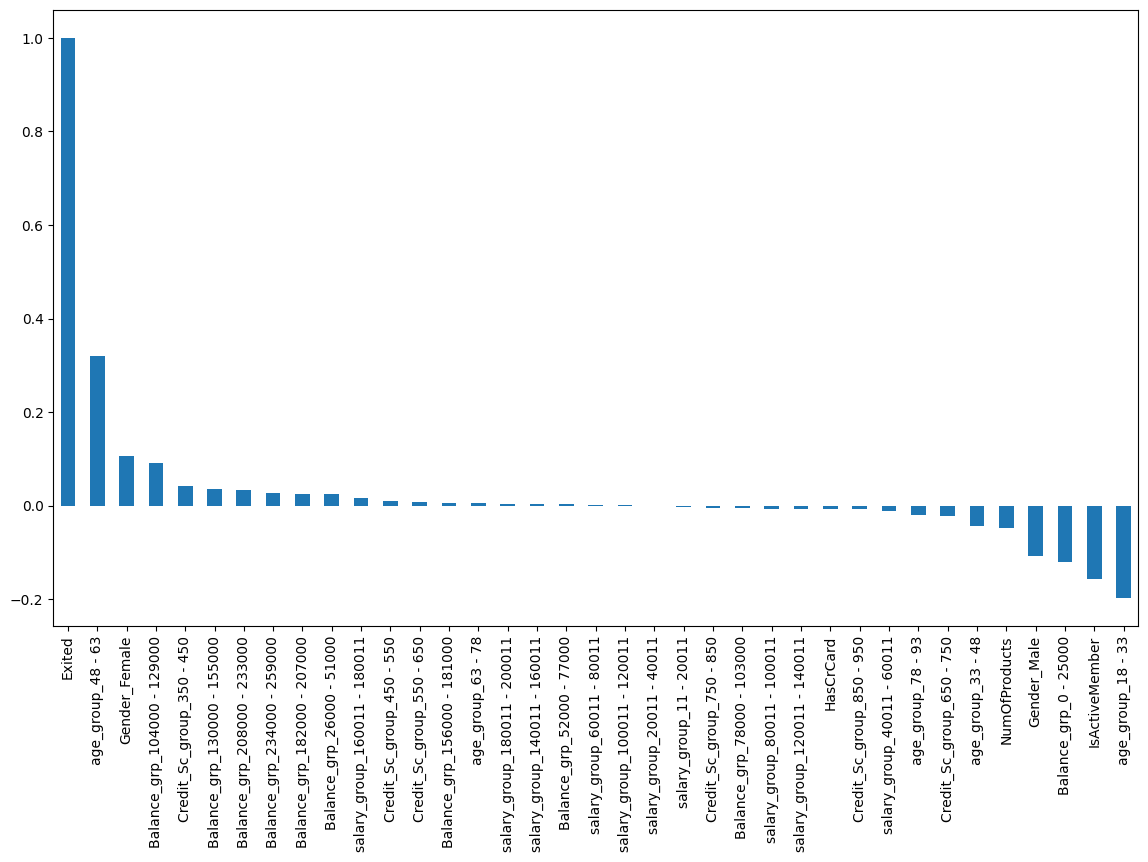

In [40]:
plt.figure(figsize=(14,8))
#bank_data_new.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')
correlations = bank_data_new.corr()['Exited'].sort_values(ascending=False)
correlations.plot(kind='bar')

## Bivariate Analysis

In [41]:
bank_data.head()

,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,Credit_Sc_group,age_group,Balance_grp,salary_group
0,Female,1,1,1,1,550 - 650,33 - 48,0 - 25000,100011 - 120011
1,Female,1,0,1,0,550 - 650,33 - 48,78000 - 103000,100011 - 120011
2,Female,3,1,0,1,450 - 550,33 - 48,156000 - 181000,100011 - 120011
3,Female,2,0,0,0,650 - 750,33 - 48,0 - 25000,80011 - 100011
4,Female,1,1,1,0,850 - 950,33 - 48,104000 - 129000,60011 - 80011


creating two new dataframe for the two classes

In [42]:
new_df_0 = bank_data.loc[bank_data['Exited']==0] #----This will be referred to as non churned in this analysis.

new_df_1 = bank_data.loc[bank_data['Exited']==1]  #----This will be referred to as churned in this analysis.

In [43]:
def plot_dist(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"]=20
    plt.rcParams["axes.titlesize"]=22
    plt.rcParams["axes.titlepad"]=30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 6)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    
    plt.show()


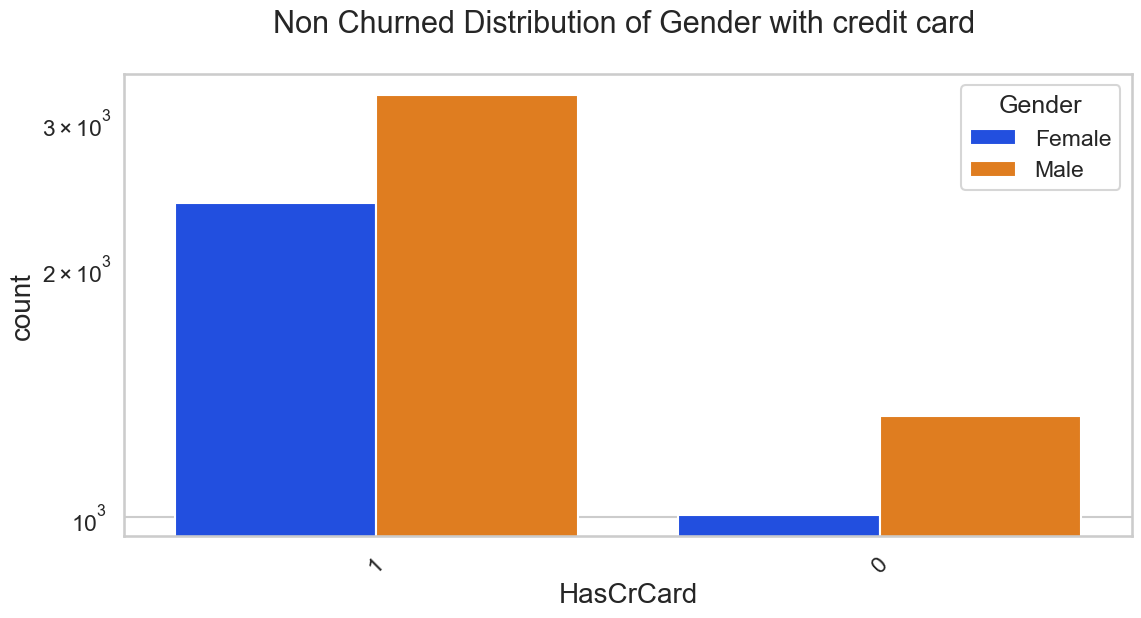

In [44]:
plot_dist(new_df_0, col= 'HasCrCard'  , title= "Non Churned Distribution of Gender with credit card ", hue = 'Gender' )

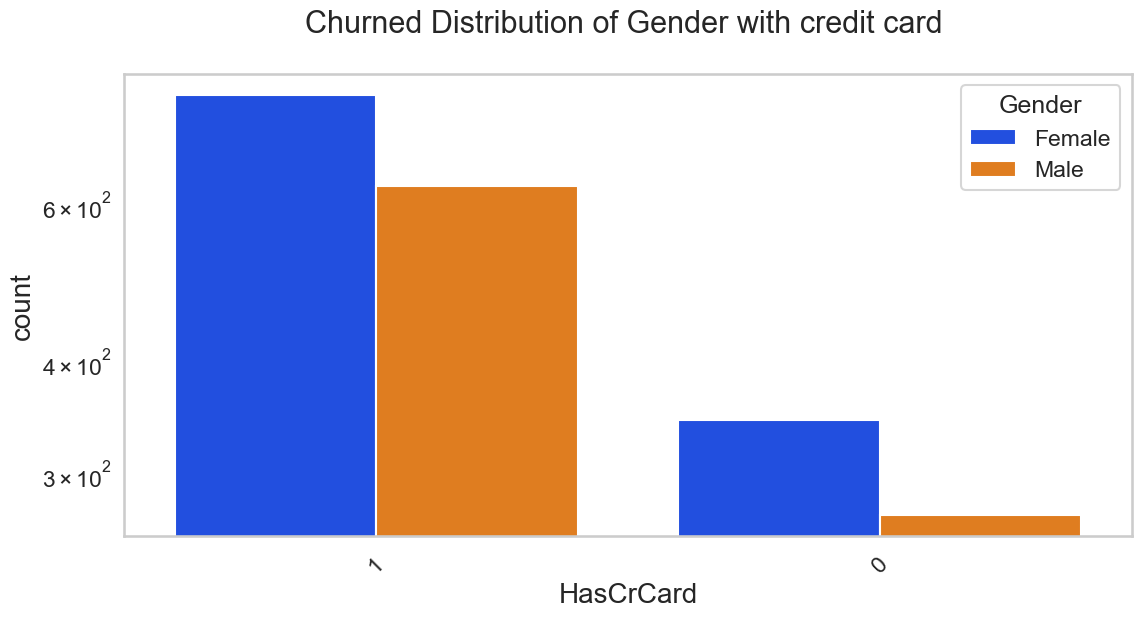

In [49]:
plot_dist(new_df_1, col= 'HasCrCard'  , title= "Churned Distribution of Gender with credit card ", hue = 'Gender' )

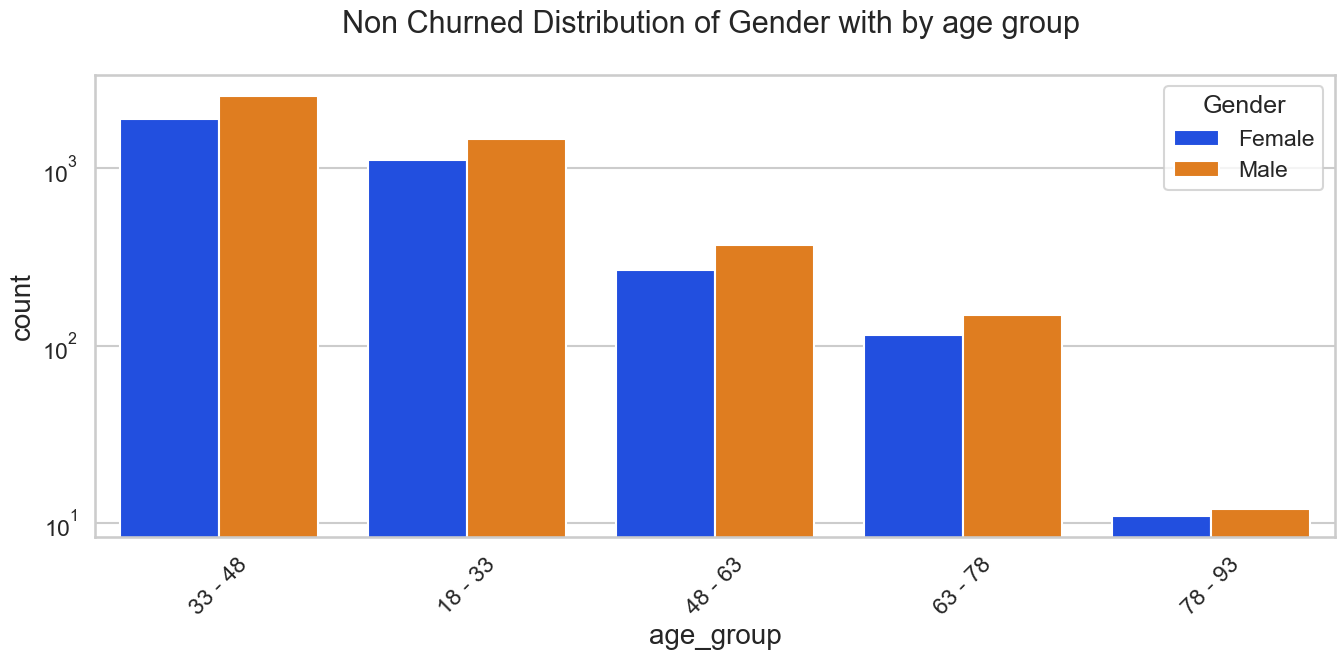

In [50]:
plot_dist(new_df_0, col= 'age_group'  , title= "Non Churned Distribution of Gender with by age group ", hue = 'Gender' )

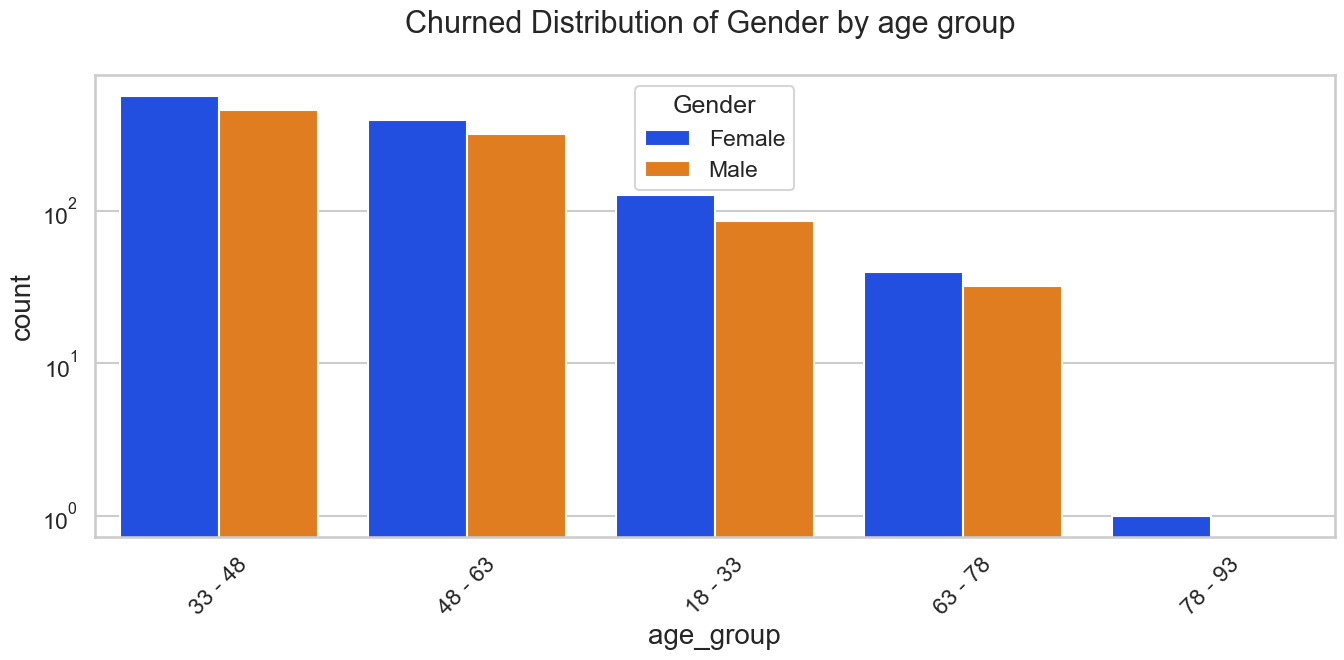

In [51]:
plot_dist(new_df_1, col= 'age_group'  , title= "Churned Distribution of Gender by age group ", hue = 'Gender' )

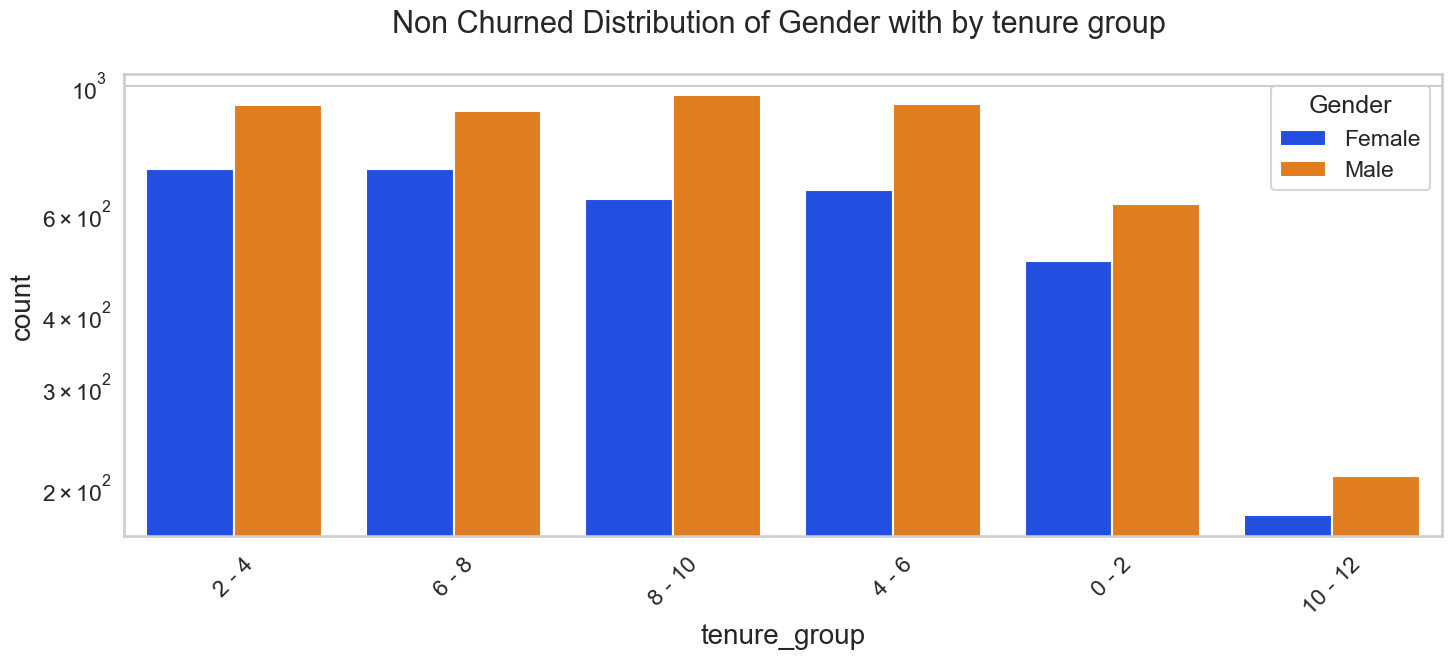

In [52]:
plot_dist(new_df_0, col= 'tenure_group'  , title= "Non Churned Distribution of Gender with by tenure group ", hue = 'Gender' )

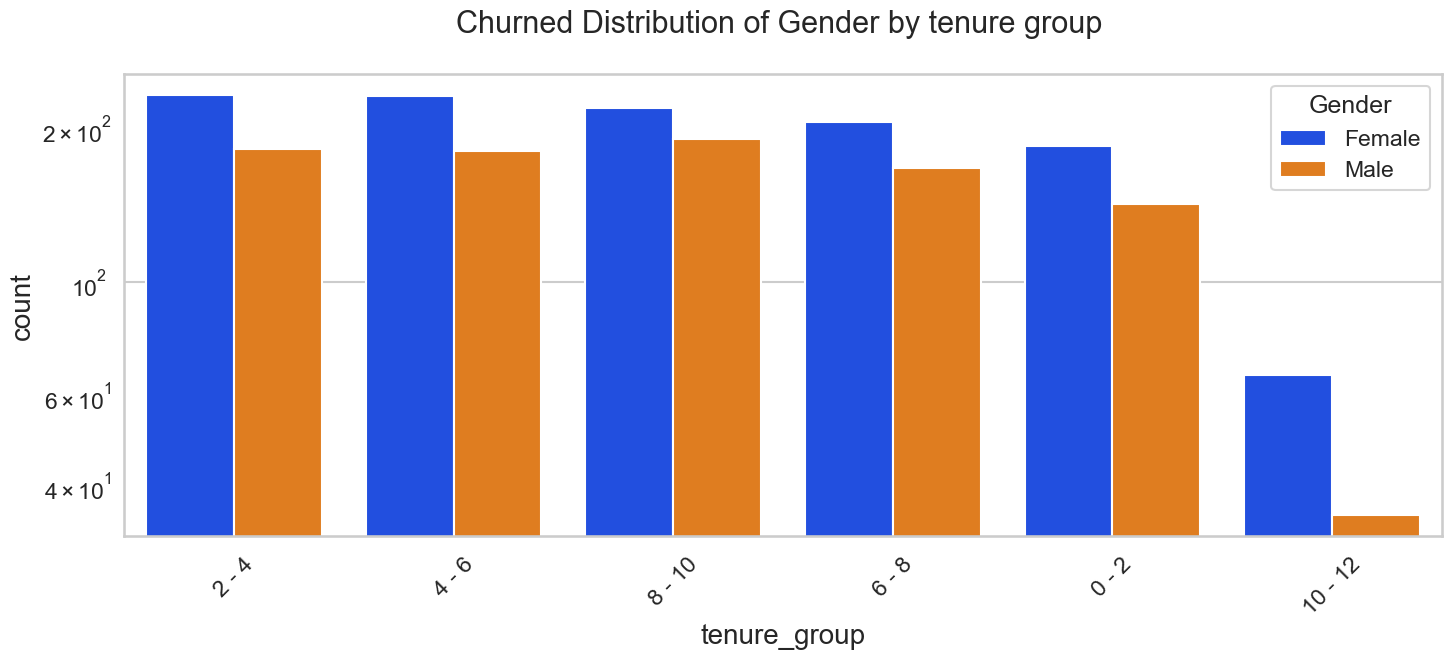

In [53]:
plot_dist(new_df_1, col= 'tenure_group'  , title= "Churned Distribution of Gender by tenure group ", hue = 'Gender' )

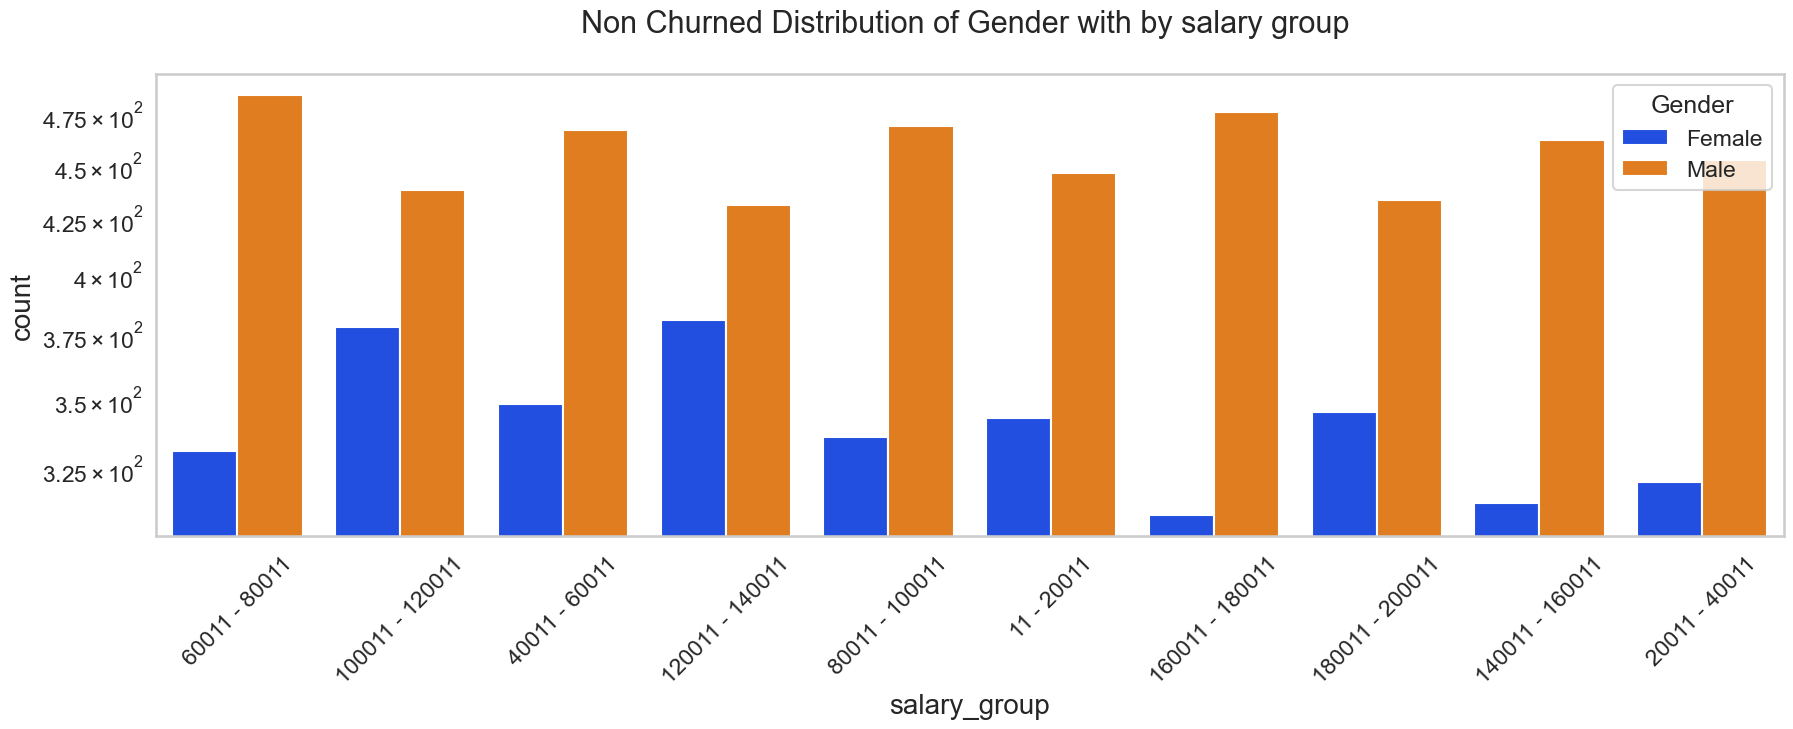

In [54]:
plot_dist(new_df_0, col= 'salary_group'  , title= "Non Churned Distribution of Gender with by salary group ", hue = 'Gender' )

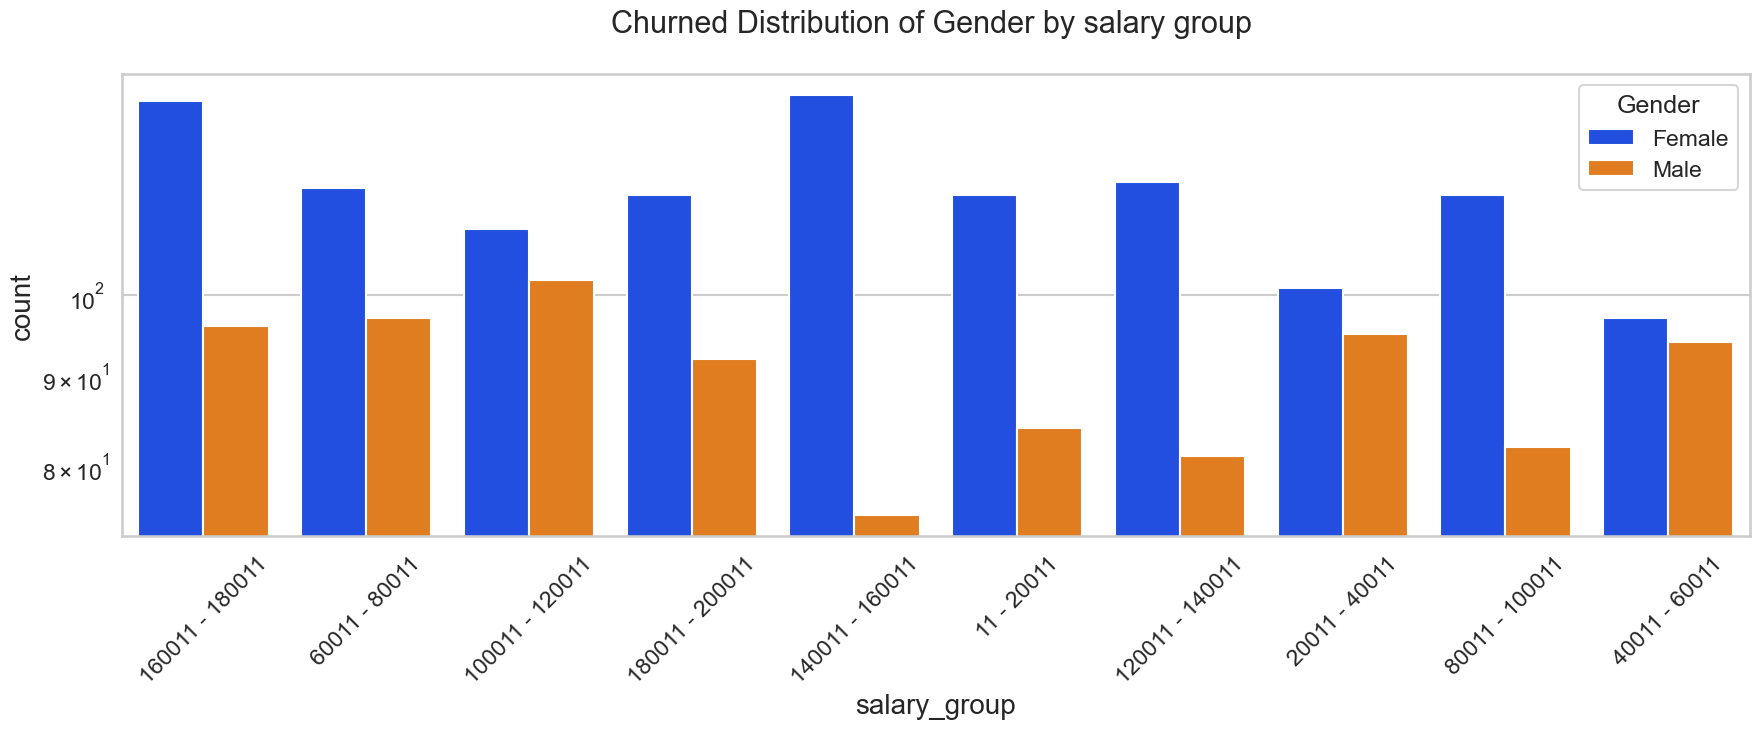

In [55]:
plot_dist(new_df_1, col= 'salary_group'  , title= "Churned Distribution of Gender by salary group ", hue = 'Gender' )

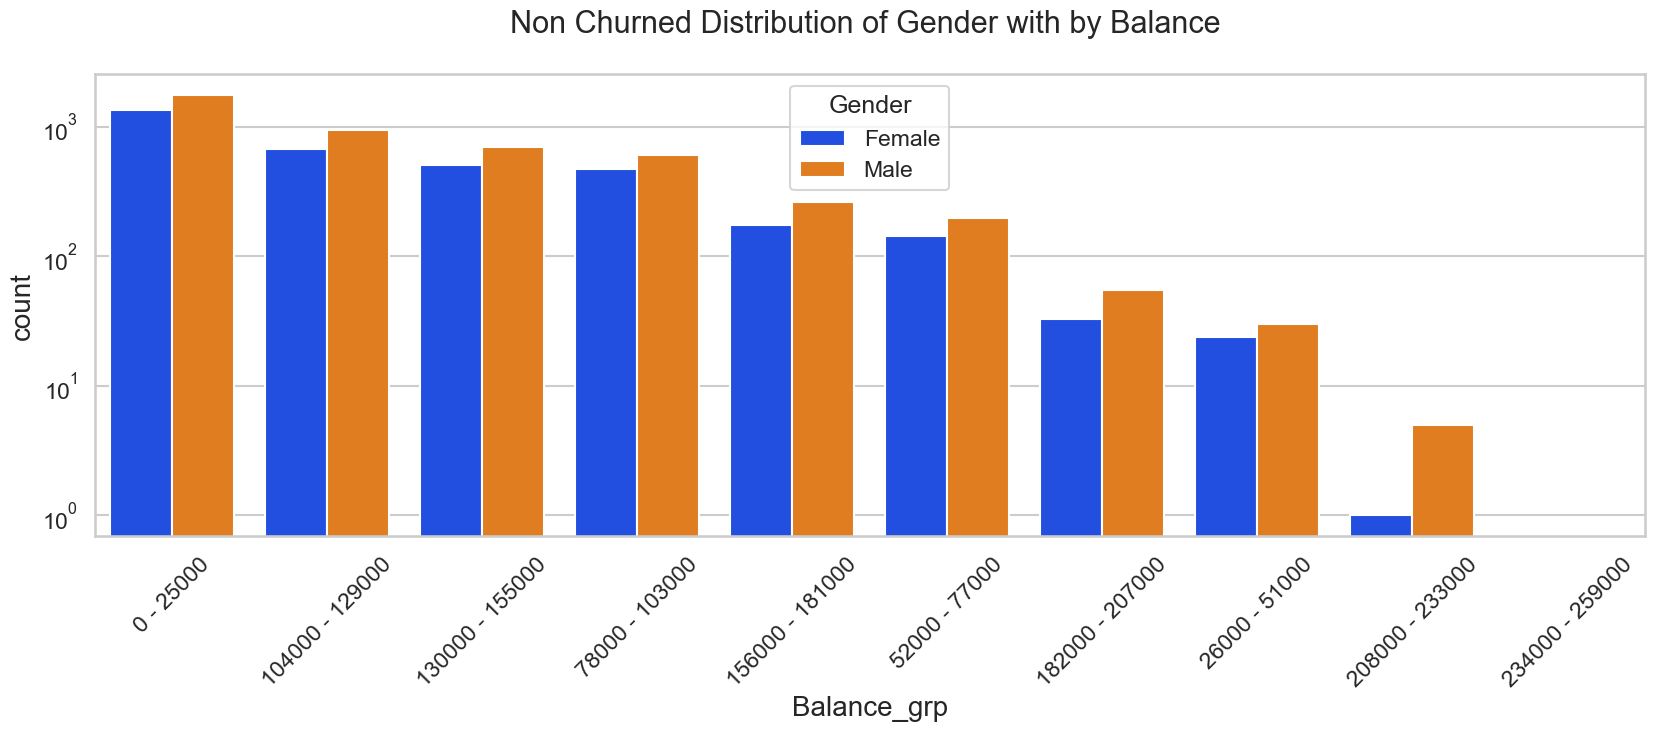

In [56]:
plot_dist(new_df_0, col= 'Balance_grp'  , title= "Non Churned Distribution of Gender with by Balance ", hue = 'Gender' )

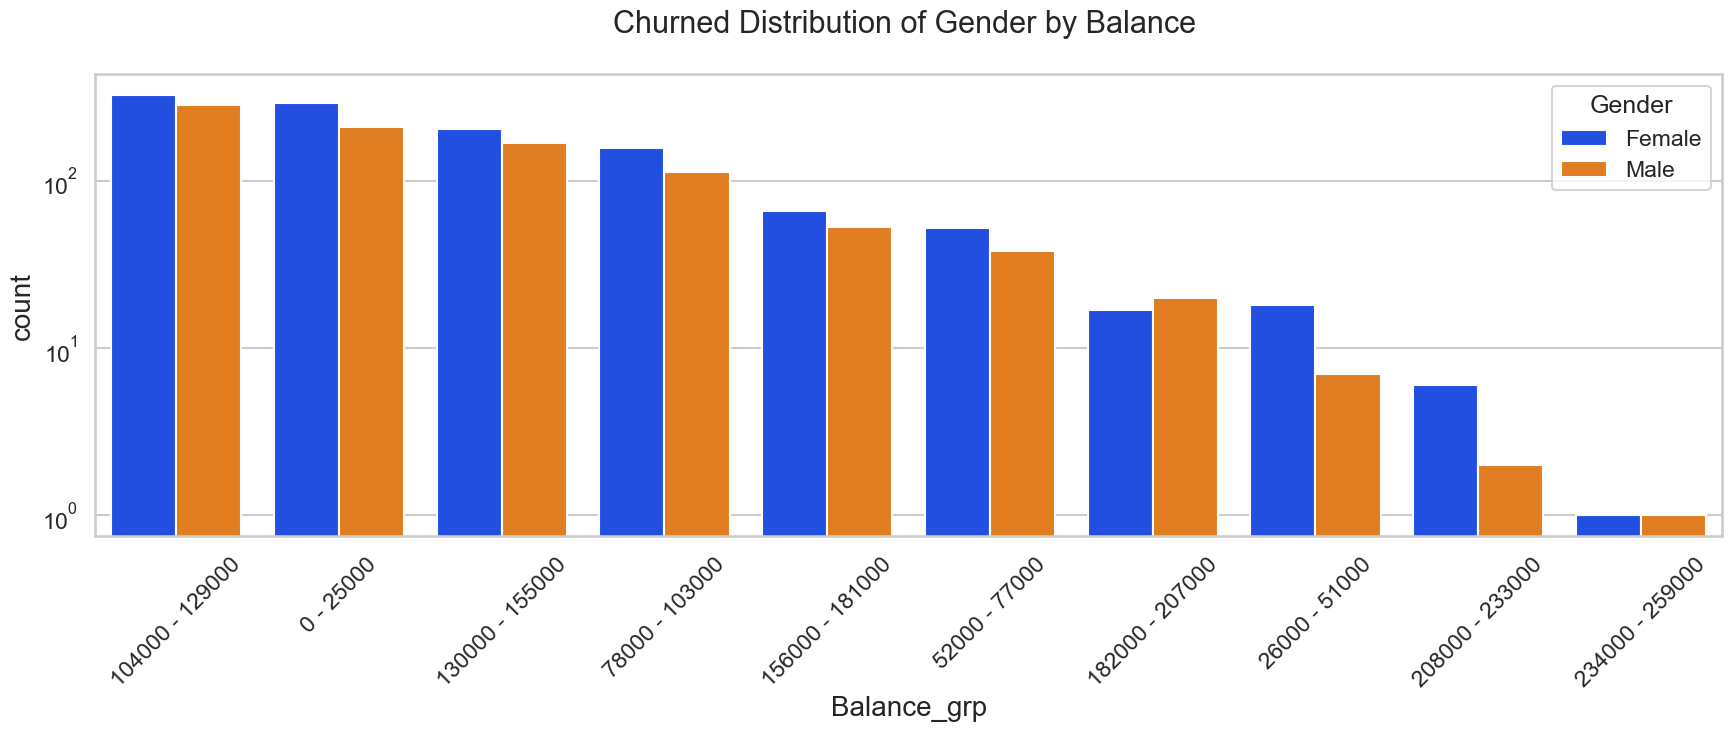

In [57]:
plot_dist(new_df_1, col= 'Balance_grp'  , title= "Churned Distribution of Gender by Balance ", hue = 'Gender' )

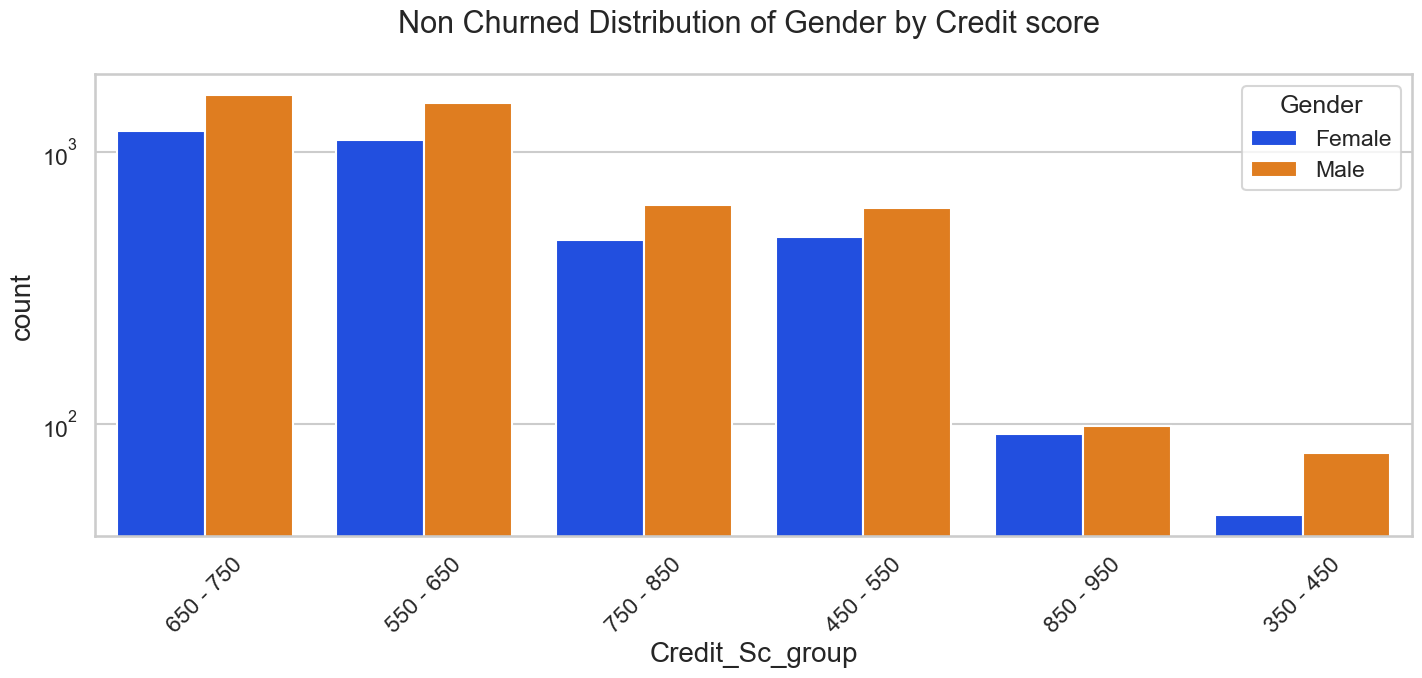

In [58]:
plot_dist(new_df_0, col= 'Credit_Sc_group'  , title= "Non Churned Distribution of Gender by Credit score ", hue = 'Gender' )

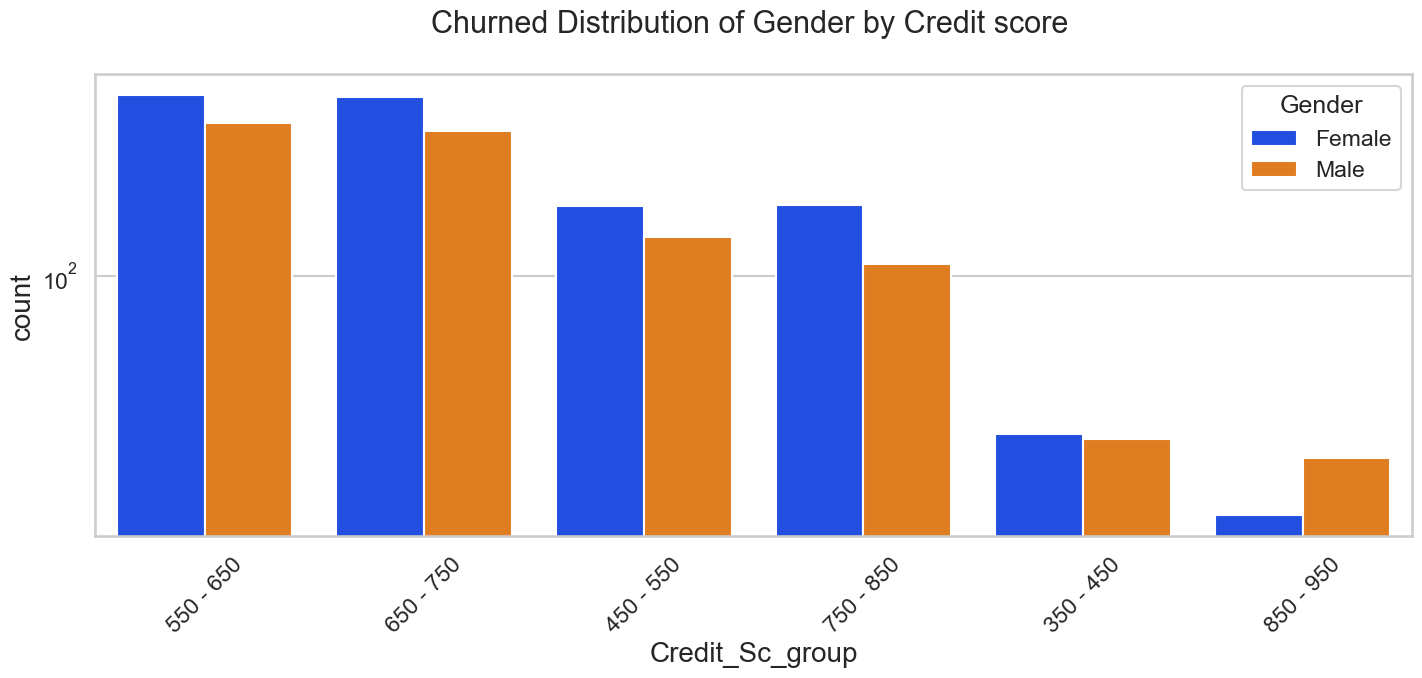

In [59]:
plot_dist(new_df_1, col= 'Credit_Sc_group'  , title= "Churned Distribution of Gender by Credit score ", hue = 'Gender' )

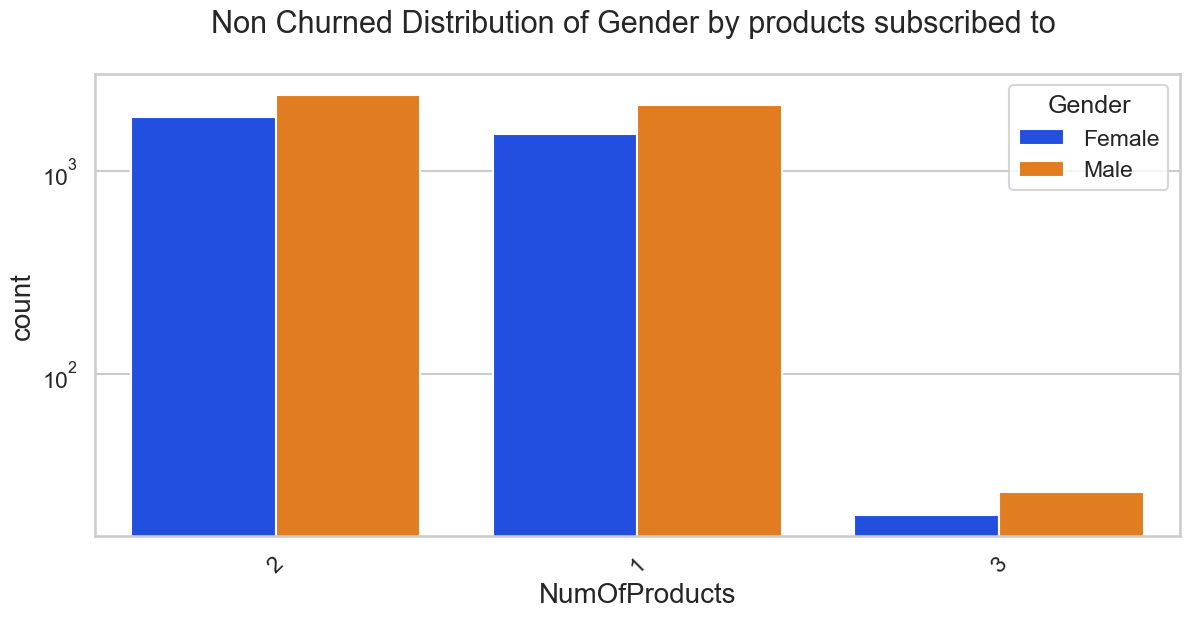

In [60]:
plot_dist(new_df_0, col= 'NumOfProducts'  , title= "Non Churned Distribution of Gender by products subscribed to ", hue = 'Gender' )

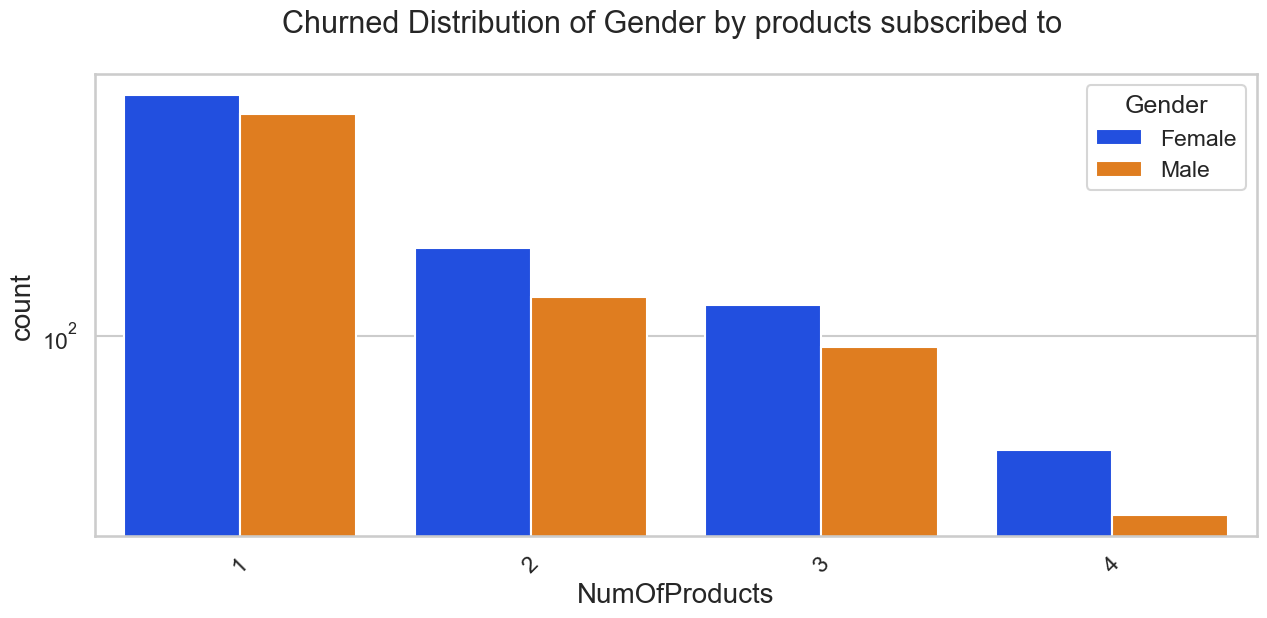

In [61]:
plot_dist(new_df_1, col= 'NumOfProducts'  , title= "Churned Distribution of Gender by products subscribed to ", hue = 'Gender' )

## Building Models

In [45]:
#importing needed libraries for model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed

In [46]:
mod_data = bank_data_new
mod_data.head()

,NumOfProducts,HasCrCard,IsActiveMember,Exited,Gender_Female,Gender_Male,Credit_Sc_group_350 - 450,Credit_Sc_group_450 - 550,Credit_Sc_group_550 - 650,Credit_Sc_group_650 - 750,...,salary_group_11 - 20011,salary_group_20011 - 40011,salary_group_40011 - 60011,salary_group_60011 - 80011,salary_group_80011 - 100011,salary_group_100011 - 120011,salary_group_120011 - 140011,salary_group_140011 - 160011,salary_group_160011 - 180011,salary_group_180011 - 200011
0,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [47]:
mod_data.shape

(10000, 37)

In [49]:
#setting my x variable
x = mod_data.drop('Exited',axis = 1)


In [50]:
#setting my y variable
y = mod_data['Exited']

## Splitting and Resampling (Oversampling with SMOTENN)

In [51]:
#Handling Balanced data
sm = SMOTEENN()
x_sampled, y_sampled = sm.fit_resample(x,y)

In [52]:
#splitting resampled dataset for tree based models
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size= 0.2, 
                                                    random_state= 42)

In [53]:
#splitting resampled dataset for distance based
x_train_dist, x_test_dist, y_train_dist, y_test_dist = train_test_split(x_sampled, y_sampled, test_size= 0.2, 
                                                                        random_state= 42)

### Scaling for distance based model

In [71]:
# Standardization
sc = StandardScaler()

x_train_dist = sc.fit_transform(x_train_dist)
x_test_dist = sc.fit_transform(x_test_dist)

## Hyper Parameter Tunning

### Tree Models

In [72]:
# Parameters for Decision Tree Classifier
params_dt = {"max_depth": randint(5,15),
              "min_samples_split": randint(2,11),
              "min_samples_leaf": randint(1,11)}

# Parameters for Random Forest
params_rf = {"n_estimators": randint(50,150),
             "max_depth": randint(5,15),
             "min_samples_split": randint(2,11),
             "min_samples_leaf": randint(1,11)}

#Parameters for Gradient Boosting
params_gbc = {"learning_rate": uniform(0.05, 0.3),
             "n_estimators": randint(50,150),
             "max_depth": randint(5,15),
             "min_samples_split": randint(2,11),
             "min_samples_leaf": randint(1,11)}

# Define the models and the parameter grid
models = [("DecisionTree", DecisionTreeClassifier(), params_dt),
          ("RandomForest", RandomForestClassifier(), params_rf),
          ("GradientBoosting", GradientBoostingClassifier(), params_gbc)]

# train the models using parallel computing
for name, model, params in models:
    random_search = RandomizedSearchCV(model, param_distributions=params, cv=3, random_state=4, n_iter=10, n_jobs=-1)
    random_search.fit(x_train, y_train)
    print(f"Best parameters for {name} : {random_search.best_params_}")
    print(f"Best score for {name} : {random_search.best_score_}")


Best parameters for DecisionTree : {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best score for DecisionTree : 0.9338308457711443
Best parameters for RandomForest : {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 144}
Best score for RandomForest : 0.9335820895522389
Best parameters for GradientBoosting : {'learning_rate': 0.340108951704103, 'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 137}
Best score for GradientBoosting : 0.9676616915422885


### Distance Models

In [73]:
# Parameters for Logistic Regression
params_lr = {"C": uniform(0.1, 10), "penalty":["l1","l2"]}

# Parameters for SVM
params_svm = {"C": uniform(0.1,10), "kernel": ['linear', 'rbf']}

# Parameters for KNN
params_knn = {"n_neighbors": randint(3,20)}

# Define the models and the parameter grid
models = [("LogisticRegression", LogisticRegression(), params_lr),
          ("SVM", svm.SVC(), params_svm),
          ("KNN", KNeighborsClassifier(), params_knn)]

# train the models using parallel computing
for name, model, params in models:
    random_search = RandomizedSearchCV(model, param_distributions=params, cv=3, random_state=4, n_iter=10, n_jobs=-1)
    random_search.fit(x_train_dist, y_train_dist)
    print(f"Best parameters for {name} : {random_search.best_params_}")
    print(f"Best score for {name} : {random_search.best_score_}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Value

Best parameters for LogisticRegression : {'C': 9.770298390136766, 'penalty': 'l2'}
Best score for LogisticRegression : 0.9309701492537313
Best parameters for SVM : {'C': 9.770298390136766, 'kernel': 'rbf'}
Best score for SVM : 0.9542288557213929
Best parameters for KNN : {'n_neighbors': 4}
Best score for KNN : 0.9070895522388059


## Evaluate model

In [74]:
def eval_model(model, xtest, ytest, name):
    ypred = model.predict(xtest)
    
    accuracy = np.round(accuracy_score(ytest, ypred),4)
    balanced_accuracy = np.round(balanced_accuracy_score(ytest, ypred),4)
    precision = np.round(precision_score(ytest, ypred),4)
    recall = np.round(recall_score(ytest, ypred),4)
    f1score = np.round(f1_score(ytest, ypred),4)
    
    return accuracy, balanced_accuracy, precision, recall,f1score 

### Writing a function for model fitting and model evaluation (Tree based model)

## Fit Model (Tree Models)

In [77]:
#model fitting
def model_fit_data(xtrain, ytrain, xtest, ytest):

    #Decision Tree
    DCT= DecisionTreeClassifier(criterion= 'entropy', max_depth= 13, min_samples_leaf= 2, min_samples_split= 4)
    DCT.fit(xtrain, ytrain)
    
    #Random Forest
    RF= RandomForestClassifier(n_estimators= 144, criterion = 'gini', 
                               max_depth = 13, min_samples_leaf= 3, min_samples_split= 9)
    RF.fit(xtrain, ytrain)
    

    #Gradient Boosted Decision Trees
    GBDT = GradientBoostingClassifier(n_estimators=137, learning_rate= 0.340108951704103, 
                                      max_depth=12, min_samples_leaf= 6, min_samples_split= 3)
    GBDT.fit(xtrain, ytrain)
    
    
    #creating an empty list to store my classifier scores
    performance_list = []
    
    #metrics to be used for evaluation of my models
    
    performance_metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score']
    
    indices= []
    
    #creating a dictionary to store my models
    
    model_dict = {
        'Decision Trees': DCT,
        'Random Forest': RF,
        'Gradient Boosted Decision Trees': GBDT}
    
    
    #Evaluating the model stored in my dictionary
    
    for name, model in model_dict.items():
        performance = eval_model(model, xtest, ytest, name)
        performance_list.append(performance)
        indices.append(name)
    
    performance_score = pd.DataFrame(performance_list, columns = performance_metrics, index = indices)
    return performance_score
   


    

In [78]:
tree_models_scores= model_fit_data(x_train, y_train, x_test, y_test)
tree_models_scores

,accuracy,balanced_accuracy,precision,recall,f1score
Decision Trees,0.9433,0.9378,0.9466,0.9619,0.9542
Random Forest,0.9413,0.9334,0.9380,0.9684,0.9530
Gradient Boosted Decision Trees,0.9746,0.9717,0.9743,0.9846,0.9794


## Distance Based models

## Fitting Distanced based models

In [83]:
#model fitting
def model_fit_dist(xtrain, ytrain, xtest, ytest):
    
    #Logistic regression
    LG = LogisticRegression(C = 9.770298390136766, penalty = 'l2')
    LG.fit(xtrain, ytrain)
    
    
    #SVM
    SVM = svm.SVC(kernel='rbf', gamma=0.1, C = 9.770298390136766)
    SVM.fit(xtrain, ytrain)
    
    #KNN
    KNN = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='uniform')
    KNN.fit(xtrain, ytrain)
    
    
    #creating an empty list to store my classifier scores
    performance_list = []
    
    #metrics to be used for evaluation of my models
    
    performance_metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score']
    
    indices= []
    
    #creating a dictionary to store my models
    
    model_dict = {
        'Logistic Regression': LG,
        'Scalar Vector Machine': SVM,
        'KNeighbors Classifier': KNN}
    
    
    #Evaluating the model stored in my dictionary
    
    for name, model in model_dict.items():
        performance = eval_model(model, xtest, ytest, name)
        performance_list.append(performance)
        indices.append(name)
    
    performance_score = pd.DataFrame(performance_list, columns = performance_metrics, index = indices)
    return performance_score
   


    

In [84]:
distance_models_scores= model_fit_dist(x_train_dist, y_train_dist, x_test_dist, y_test_dist)
distance_models_scores

,accuracy,balanced_accuracy,precision,recall,f1score
Logistic Regression,0.9304,0.9330,0.9636,0.9214,0.9420
Scalar Vector Machine,0.9587,0.9599,0.9776,0.9546,0.9660
KNeighbors Classifier,0.9622,0.9592,0.9662,0.9724,0.9693


In [85]:
model_scores = pd.concat([tree_models_scores, distance_models_scores])
model_scores

,accuracy,balanced_accuracy,precision,recall,f1score
Decision Trees,0.9433,0.9378,0.9466,0.9619,0.9542
Random Forest,0.9413,0.9334,0.9380,0.9684,0.9530
Gradient Boosted Decision Trees,0.9746,0.9717,0.9743,0.9846,0.9794
Logistic Regression,0.9304,0.9330,0.9636,0.9214,0.9420
Scalar Vector Machine,0.9587,0.9599,0.9776,0.9546,0.9660
KNeighbors Classifier,0.9622,0.9592,0.9662,0.9724,0.9693


In [91]:
from matplotlib import rcParams

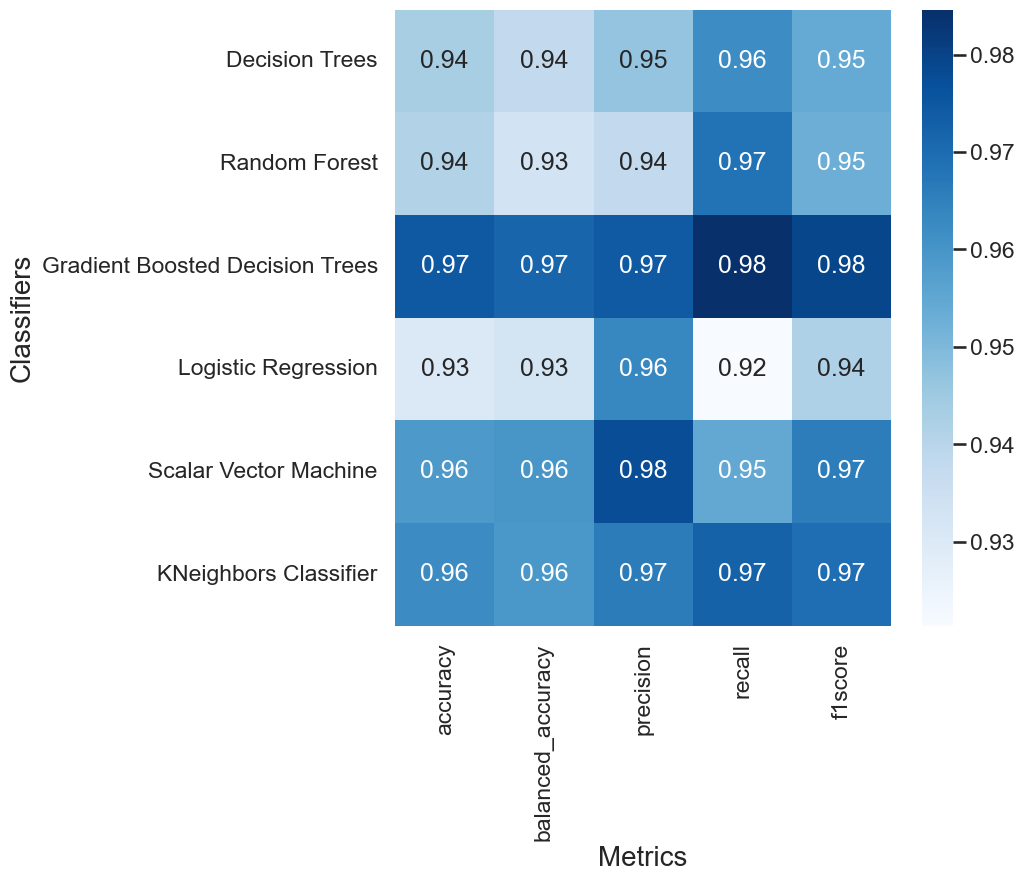

In [101]:
#rcParams['figure.figsize'] = 8,8
sns.heatmap(model_scores, annot = True, cmap= 'Blues')
plt.xlabel('Metrics')
plt.ylabel('Classifiers')
plt.savefig("model_scores.png")

In [87]:
model_scores.to_csv('model_scores.csv')

### Visualizing Confusion matrix

In [112]:
def confusion(models,X_train, y_train, X_test, y_test, classes):
    """
    This function takes in a dictionary of models, training data, test data, true labels, class labels and cmap
    as parameters. It trains each model with provided hyperparameters, creates a confusion matrix and visualizes it.
    """
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy : ", accuracy)
        conf_mat = confusion_matrix(y_test, y_pred)
        confusion_matrix_display = ConfusionMatrixDisplay(conf_mat, display_labels=classes)
        confusion_matrix_display.plot()
        plt.title(f"{name} Confusion Matrix")
        plt.show()

## Tree Models

Accuracy :  0.9104922923918448


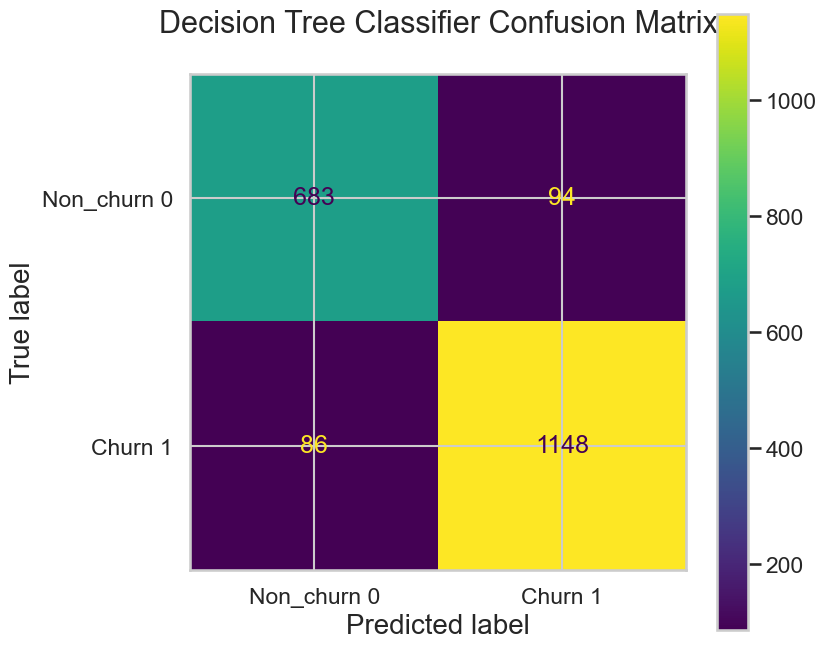

Accuracy :  0.9328692192938837


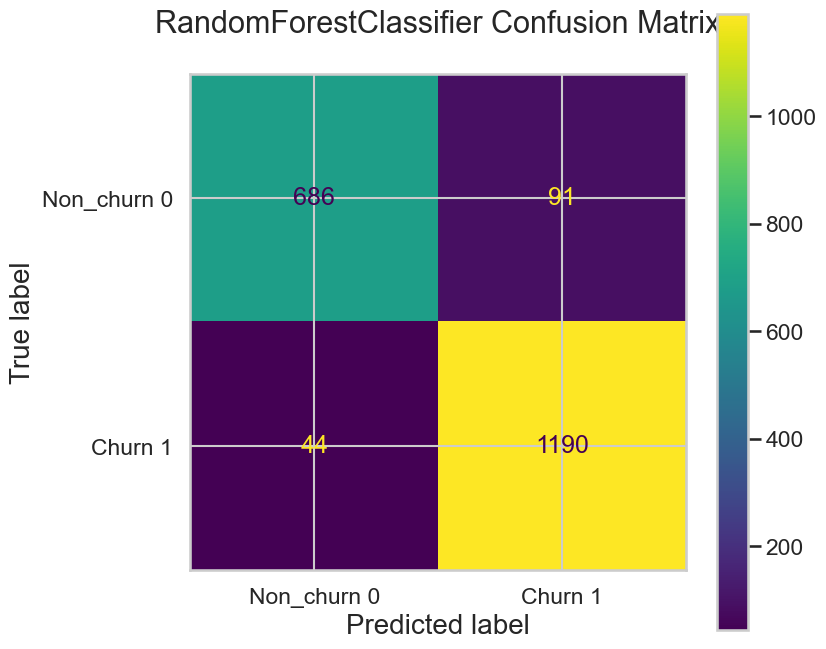

Accuracy :  0.9298856290402785


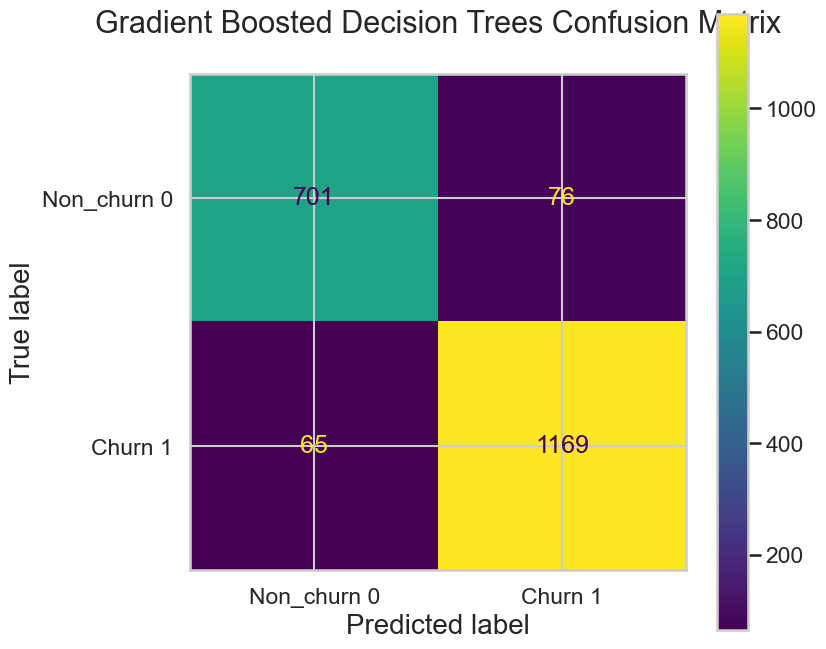

In [113]:
model_tree = {'Decision Tree Classifier': DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, 
                                                             min_samples_leaf= 6, min_samples_split= 2),
          
          'RandomForestClassifier': RandomForestClassifier(n_estimators= 50, criterion = 'gini', 
                               max_depth = 10, min_samples_leaf= 2, min_samples_split= 10),
          
         'Gradient Boosted Decision Trees': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                                                       max_depth=3, min_samples_leaf= 8)}

confusion(model_tree,x_train, y_train, x_test, y_test, classes= ["Non_churn 0","Churn 1"])

## Distance based models

Accuracy :  0.9333664843361512


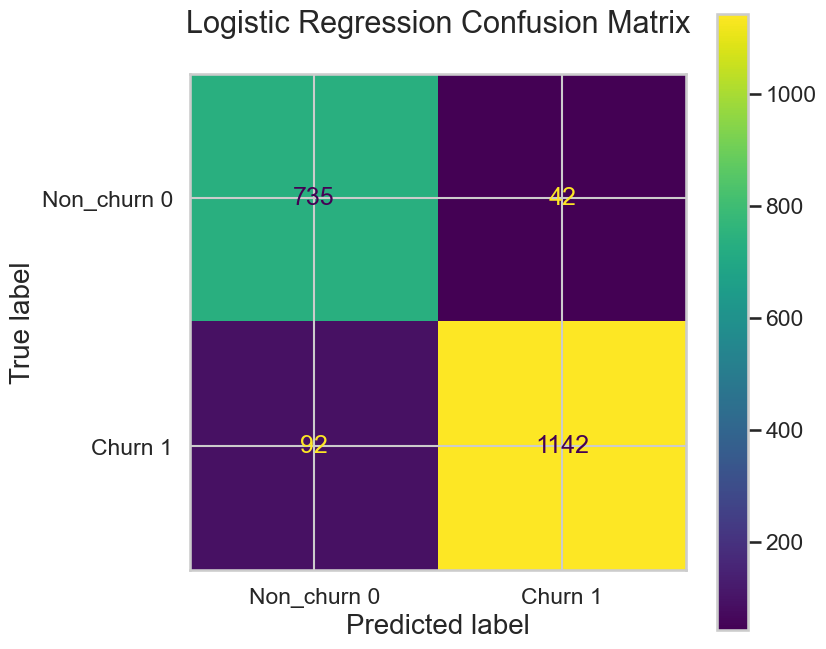

Accuracy :  0.9572352063649925


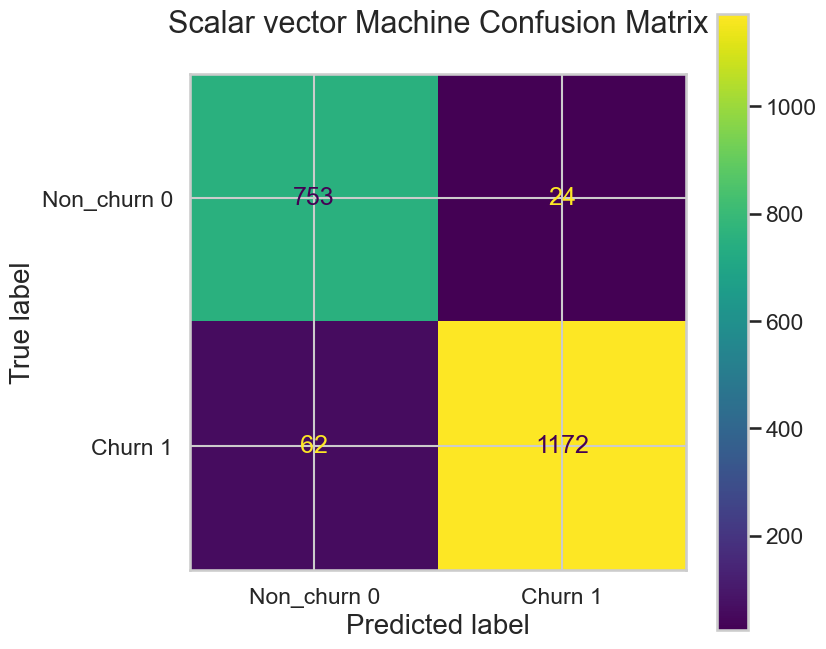

Accuracy :  0.9622078567876678


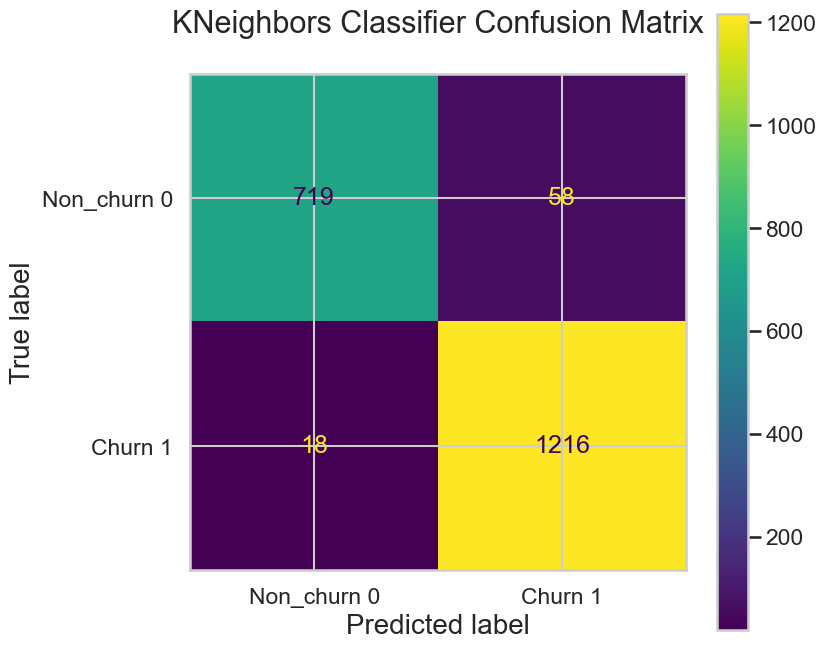

In [114]:
model_dist = {'Logistic Regression': LogisticRegression(random_state=100),
          
          'Scalar vector Machine':svm.SVC(kernel='rbf', gamma=0.1),
          
         'KNeighbors Classifier': KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform')}

confusion(model_dist,x_train_dist, y_train_dist, x_test_dist, y_test_dist, classes= ["Non_churn 0","Churn 1"])

## Plotting ROC AUC

In [115]:
def roc_auc(models, X_train, y_train, X_test, y_test):
    """
    This function takes in a dictionary of models, training data, test data and true labels
    as parameters. It trains each model with provided hyperparameters, 
    predicts the probabilities of the test set, and plots the ROC-AUC curve for each model.
    """
    plt.style.use('seaborn-whitegrid')
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr,tpr,label=f"{name} (AUC={auc:.2f})", linestyle='-')
        plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='-',label="Random Classifier (AUC = 0.5)")
        plt.legend(loc='lower right', borderaxespad=0., frameon=True, edgecolor='black', bbox_to_anchor=(1.2,0))
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC-AUC Curve for {name}")
    plt.show()


## Tree Models

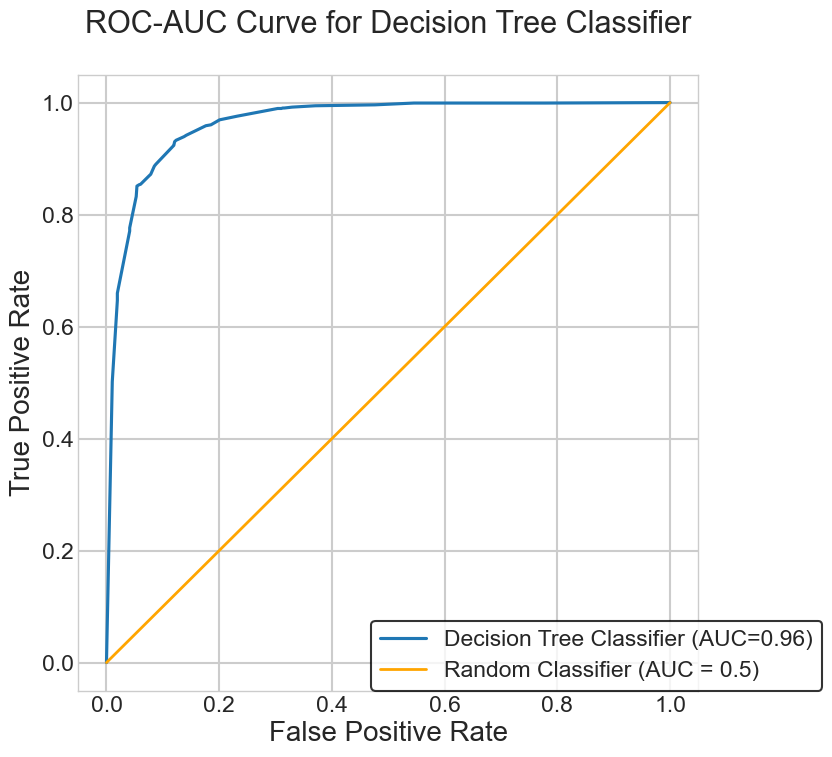

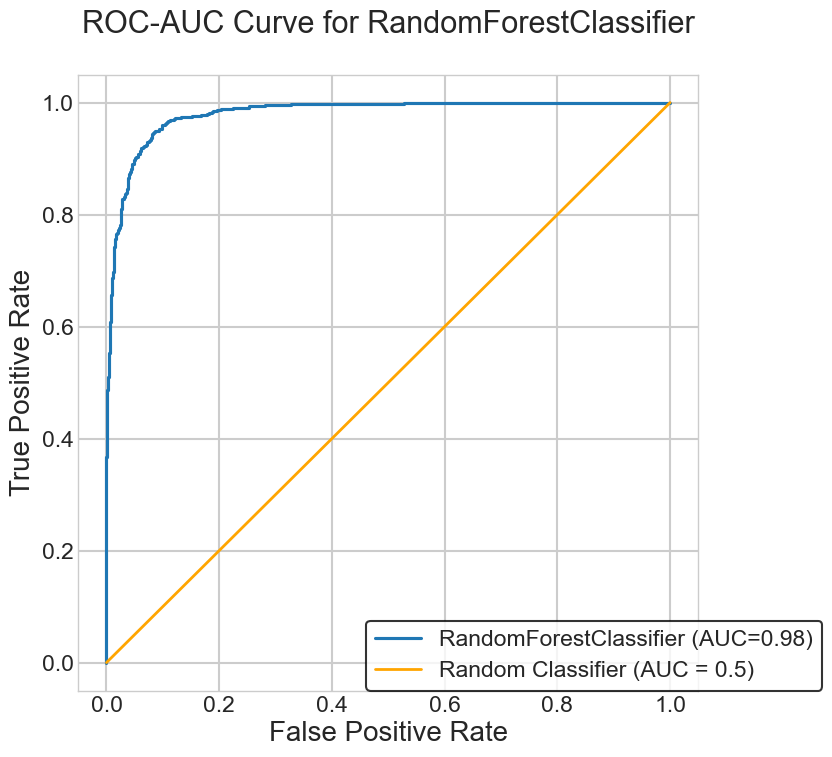

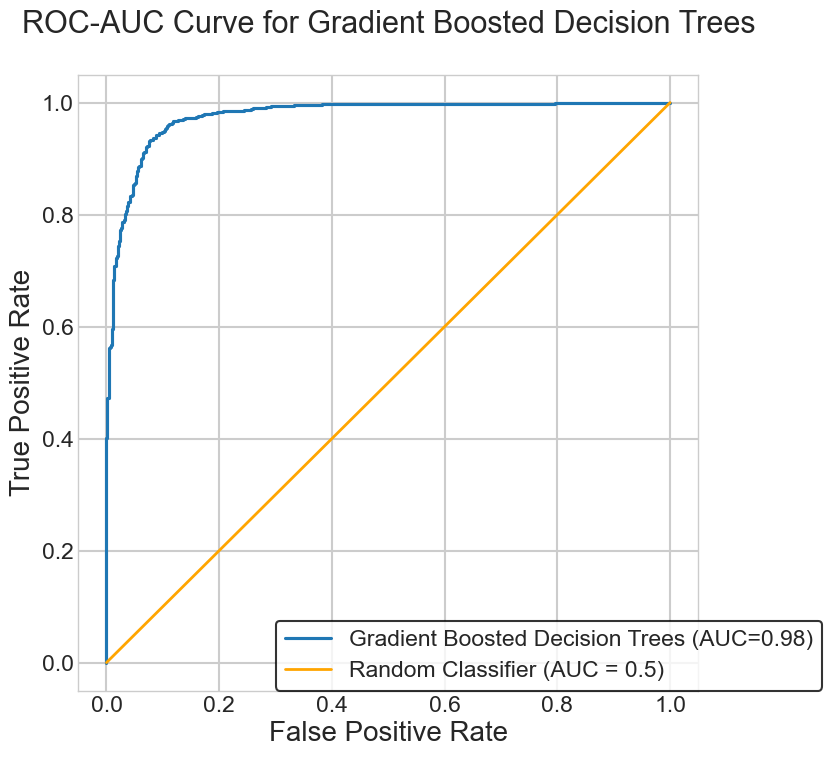

In [116]:
roc_auc(model_tree, x_train, y_train, x_test, y_test)

## Distance based

In [119]:
#Set probability to True in SVM
model_dist = {'Logistic Regression': LogisticRegression(random_state=100),
          
          'Scalar vector Machine':svm.SVC(kernel='rbf', gamma=0.1, probability = True),
          
         'KNeighbors Classifier': KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform')}

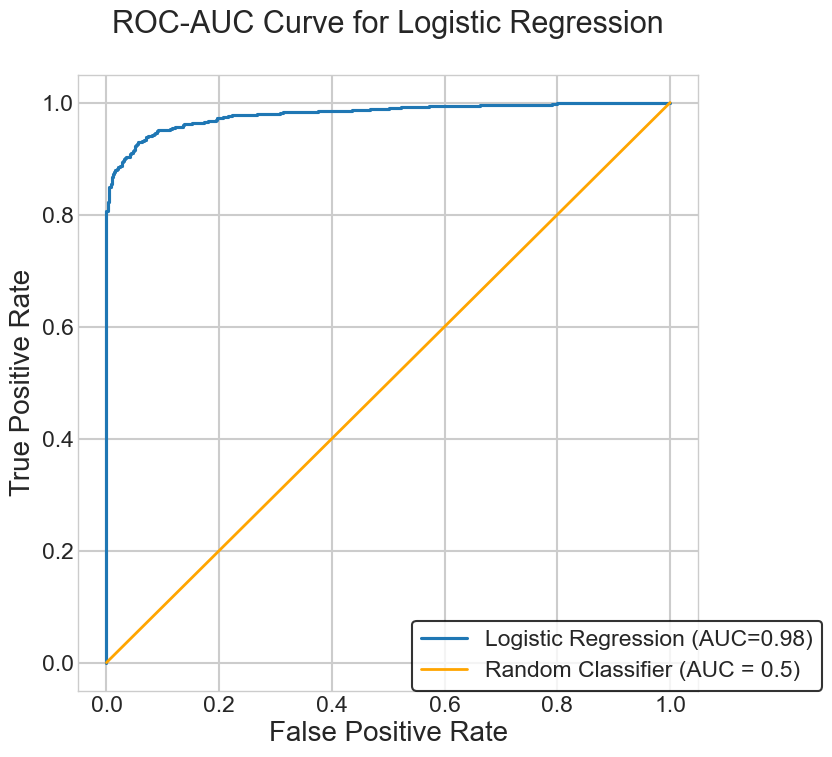

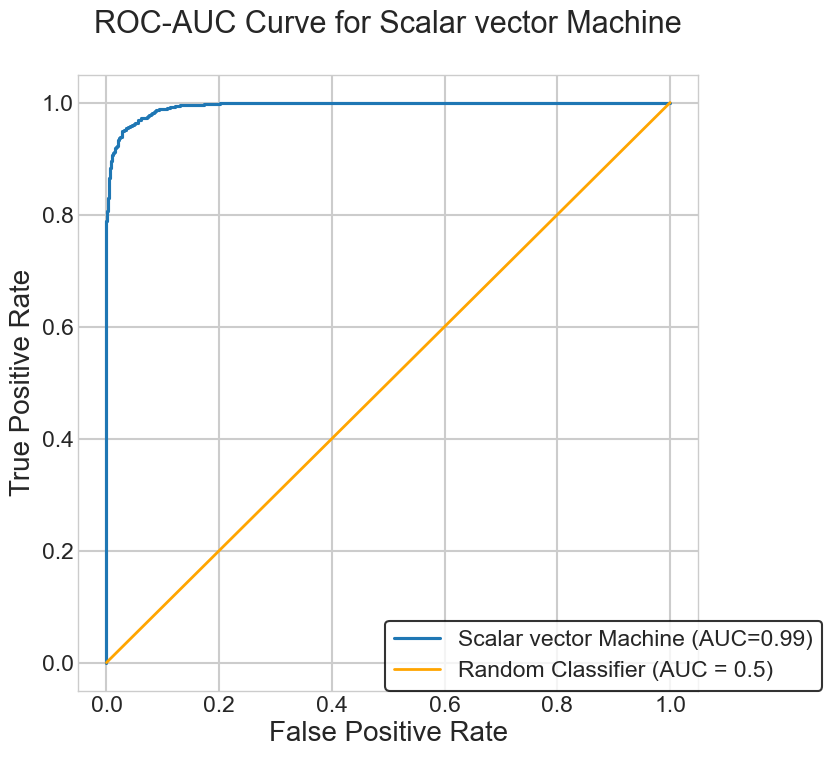

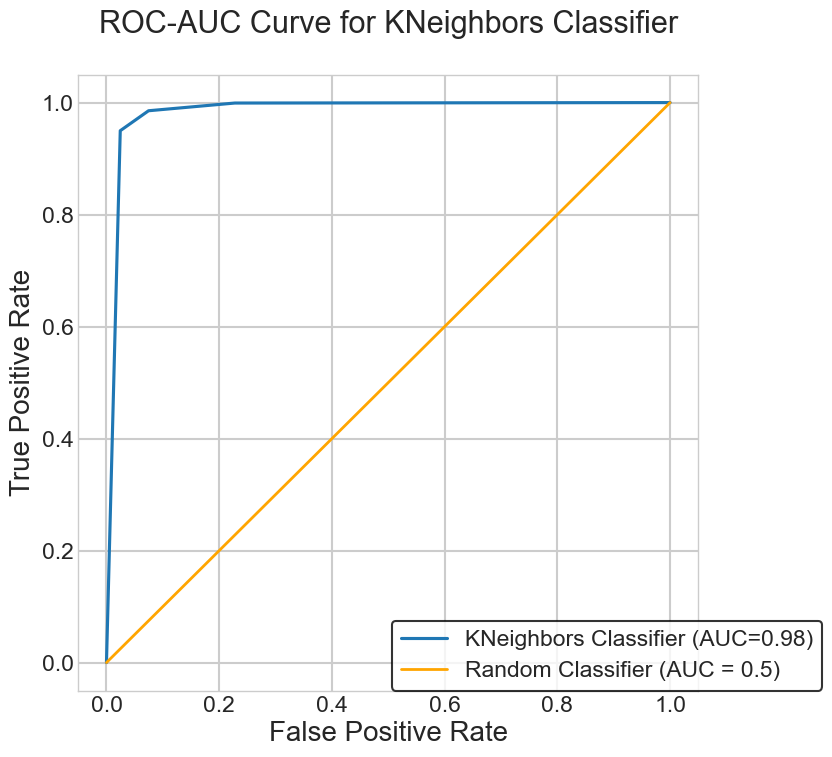

In [120]:
roc_auc(model_dist,x_train_dist, y_train_dist, x_test_dist, y_test_dist)

## Encoding Gender Data only

<p>I am encoding only the gender column data for training my models,
since originally every other column that are useful are already numerical data apart from the gender column
And I also what to compare where my model perform best, either with generating new grouped features or with no new generated features</p>

In [ ]:
data_bank = bd.copy()
data_bank

In [ ]:
data_bank.drop(columns = ['RowNumber', 'CustomerId', 'Surname'
                          ,'Geography'],axis = 1, inplace = True)
data_bank.head()

In [ ]:
bank_gen_enc = pd.get_dummies(data_bank, columns=["Gender"])
bank_gen_enc.head()

In [ ]:
data_mod = bank_gen_enc
mod_data.head()

In [ ]:
data_mod.shape

In [ ]:
#setting my x variable
x_g = data_mod.drop('Exited',axis = 1)

In [ ]:
#setting my y variable
y_g = data_mod['Exited']

## Resampling (Oversampling with SMOTENN)

In [ ]:
#Handling Balanced data
sm = SMOTEENN()
x_sampled_g, y_sampled_g = sm.fit_resample(x_g,y_g)

In [ ]:
#splitting resampled dataset for tree based models
x_train_g, x_test_g, y_train_g, y_test_g = train_test_split(x_sampled_g, y_sampled_g, test_size= 0.2, 
                                                    random_state= 42)

In [ ]:
#splitting resampled dataset for distance based
x_train_dist_g, x_test_dist_g, y_train_dist_g, y_test_dist_g = train_test_split(x_sampled_g, y_sampled_g, test_size= 0.2, 
                                                                        random_state= 42)

### Scaling for distance based model

In [ ]:
# Standardization
sc = StandardScaler()

x_train_dist_g = sc.fit_transform(x_train_dist_g)
x_test_dist_g = sc.fit_transform(x_test_dist_g)

## Hyper Parameter Tunning

### Tree Models

In [ ]:
# Parameters for Decision Tree Classifier
params_dt = {"max_depth": randint(5,15),
              "min_samples_split": randint(2,11),
              "min_samples_leaf": randint(1,11)}

# Parameters for Random Forest
params_rf = {"n_estimators": randint(50,150),
             "max_depth": randint(5,15),
             "min_samples_split": randint(2,11),
             "min_samples_leaf": randint(1,11)}

#Parameters for Gradient Boosting
params_gbc = {"learning_rate": uniform(0.05, 0.3),
             "n_estimators": randint(50,150),
             "max_depth": randint(5,15),
             "min_samples_split": randint(2,11),
             "min_samples_leaf": randint(1,11)}

# Define the models and the parameter grid
models = [("DecisionTree", DecisionTreeClassifier(), params_dt),
          ("RandomForest", RandomForestClassifier(), params_rf),
          ("GradientBoosting", GradientBoostingClassifier(), params_gbc)]

# train the models using parallel computing
for name, model, params in models:
    random_search = RandomizedSearchCV(model, param_distributions=params, cv=3, random_state=4, n_iter=10, n_jobs=-1)
    random_search.fit(x_train_g, y_train_g)
    print(f"Best parameters for {name} : {random_search.best_params_}")
    print(f"Best score for {name} : {random_search.best_score_}")


### Distance Models

In [ ]:
# Parameters for Logistic Regression
params_lr = {"C": uniform(0.1, 10), "penalty":["l1","l2"]}

# Parameters for SVM
params_svm = {"C": uniform(0.1,10), "kernel": ['linear', 'rbf']}

# Parameters for KNN
params_knn = {"n_neighbors": randint(3,20)}

# Define the models and the parameter grid
models = [("LogisticRegression", LogisticRegression(), params_lr),
          ("SVM", svm.SVC(), params_svm),
          ("KNN", KNeighborsClassifier(), params_knn)]

# train the models using parallel computing
for name, model, params in models:
    random_search = RandomizedSearchCV(model, param_distributions=params, cv=3, random_state=4, n_iter=10, n_jobs=-1)
    random_search.fit(x_train_dist, y_train_dist)
    print(f"Best parameters for {name} : {random_search.best_params_}")
    print(f"Best score for {name} : {random_search.best_score_}")

### Writing a function for model fitting and model evaluation (Tree based model)

## Fit Model (Tree Models)

In [ ]:
#model fitting
def model_fit_data(xtrain, ytrain, xtest, ytest):

    #Decision Tree
    DCT= DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 6, min_samples_split= 7)
    DCT.fit(xtrain, ytrain)
    
    #Random Forest
    RF= RandomForestClassifier(n_estimators= 144, criterion = 'gini', 
                               max_depth = 13, min_samples_leaf= 3, min_samples_split= 9)
    RF.fit(xtrain, ytrain)
    

    #Gradient Boosted Decision Trees
    GBDT = GradientBoostingClassifier(n_estimators=105, learning_rate= 0.23271068043499177, 
                                      max_depth=14, min_samples_leaf= 9, min_samples_split= 4)
    GBDT.fit(xtrain, ytrain)
    
    
    #creating an empty list to store my classifier scores
    performance_list = []
    
    #metrics to be used for evaluation of my models
    
    performance_metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score']
    
    indices= []
    
    #creating a dictionary to store my models
    
    model_dict = {
        'Decision Trees': DCT,
        'Random Forest': RF,
        'Gradient Boosted Decision Trees': GBDT}
    
    
    #Evaluating the model stored in my dictionary
    
    for name, model in model_dict.items():
        performance = eval_model(model, xtest, ytest, name)
        performance_list.append(performance)
        indices.append(name)
    
    performance_score = pd.DataFrame(performance_list, columns = performance_metrics, index = indices)
    return performance_score
   


    

In [ ]:
tree_models_scores_g= model_fit_data(x_train_g, y_train_g, x_test_g, y_test_g)
tree_models_scores_g

## Distance Based models

## Fitting Distanced based models

In [ ]:
#model fitting
def model_fit_dist(xtrain, ytrain, xtest, ytest):
    
    #Logistic regression
    LG = LogisticRegression(C =  9.770298390136766, penalty = 'l2')
    LG.fit(xtrain, ytrain)
    
    
    #SVM
    SVM = svm.SVC(kernel='rbf', gamma=0.1, C = 7.084202359093901)
    SVM.fit(xtrain, ytrain)
    
    #KNN
    KNN = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='uniform')
    KNN.fit(xtrain, ytrain)
    
    
    #creating an empty list to store my classifier scores
    performance_list = []
    
    #metrics to be used for evaluation of my models
    
    performance_metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score']
    
    indices= []
    
    #creating a dictionary to store my models
    
    model_dict = {
        'Logistic Regression': LG,
        'Scalar Vector Machine': SVM,
        'KNeighbors Classifier': KNN}
    
    
    #Evaluating the model stored in my dictionary
    
    for name, model in model_dict.items():
        performance = eval_model(model, xtest, ytest, name)
        performance_list.append(performance)
        indices.append(name)
    
    performance_score = pd.DataFrame(performance_list, columns = performance_metrics, index = indices)
    return performance_score
   


    

In [ ]:
distance_models_scores_g= model_fit_dist(x_train_dist_g, y_train_dist_g, x_test_dist_g, y_test_dist_g)
distance_models_scores_g

In [ ]:
model_scores_g = pd.concat([tree_models_scores_g, distance_models_scores_g])
model_scores_g

In [ ]:
sns.heatmap(model_scores_g, annot = True, cmap= 'Blues')
plt.xlabel('Metrics')
plt.ylabel('Classifiers')
plt.savefig("model_scores3.png")

## Tree Models

In [ ]:
model_tree = {'Decision Tree Classifier': DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, 
                                                             min_samples_leaf= 6, min_samples_split= 2),
          
          'RandomForestClassifier': RandomForestClassifier(n_estimators= 50, criterion = 'gini', 
                               max_depth = 10, min_samples_leaf= 2, min_samples_split= 10),
          
         'Gradient Boosted Decision Trees': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                                                       max_depth=3, min_samples_leaf= 8)}

confusion(model_tree_g,x_train_g, y_train_g, x_test_g, y_test_g, classes= ["Non_churn 0","Churn 1"])

## Distance based models

In [ ]:
model_dist = {'Logistic Regression': LogisticRegression(random_state=100),
          
          'Scalar vector Machine':svm.SVC(kernel='rbf', gamma=0.1),
          
         'KNeighbors Classifier': KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform')}

confusion(model_dist,x_train_dist, y_train_dist, x_test_dist, y_test_dist, classes= ["Non_churn 0","Churn 1"])

## Plotting ROC AUC

## Tree Models

In [ ]:
roc_auc(model_tree_g, x_train_g, y_train_g, x_test_g, y_test_g)

## Distance based

In [ ]:
#Set probability to True in SVM
model_dist = {'Logistic Regression': LogisticRegression(random_state=100),
          
          'Scalar vector Machine':svm.SVC(kernel='rbf', gamma=0.1, probability = True),
          
         'KNeighbors Classifier': KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform')}

In [ ]:
roc_auc(model_dist_g,x_train_dist_g, y_train_dist_g, x_test_dist_g, y_test_dist_g)